In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Storing the csv file in a variable for easy access
file_name = 'FIFA23_official_data.csv'

In [ ]:
# Import csv files using a panda dataframe
df = pd.read_csv(file_name)

In [ ]:
# Inspecting the dataframe
df.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
5,212622,J. Kimmich,27,https://cdn.sofifa.net/players/212/622/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,89,90,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos9"">RDM","Jul 1, 2015",NaN,2025,177cm,75kg,€182M,6.0,NaN
6,197445,D. Alaba,30,https://cdn.sofifa.net/players/197/445/23_60.png,Austria,https://cdn.sofifa.net/flags/at.png,86,86,Real Madrid CF,https://cdn.sofifa.net/teams/243/30.png,...,Yes,"<span class=""pos pos6"">LCB","Jul 1, 2021",NaN,2026,180cm,78kg,€113.8M,4.0,NaN
7,187961,22 Paulinho,32,https://cdn.sofifa.net/players/187/961/22_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,83,83,Al Ahli,https://cdn.sofifa.net/teams/112387/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jul 22, 2021",NaN,2024,183cm,80kg,€48.5M,15.0,NaN
8,208333,E. Can,28,https://cdn.sofifa.net/players/208/333/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,82,82,Borussia Dortmund,https://cdn.sofifa.net/teams/22/30.png,...,Yes,"<span class=""pos pos28"">SUB","Feb 18, 2020",NaN,2024,186cm,86kg,€51.9M,23.0,NaN
9,210514,João Cancelo,28,https://cdn.sofifa.net/players/210/514/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,88,88,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos7"">LB","Aug 7, 2019",NaN,2027,182cm,74kg,€152.6M,7.0,NaN


As we can see there are close to 18k rows and 29 attributes as this includes the players in all the football leagues.

Let us drop redundant columns so that we get the data for further analysis.

In [ ]:
# Creating a copy of data for further process
data = df.copy()

In [ ]:
# Dropping unnecessary columns
data = data.drop(['ID','Photo','Flag','Club Logo','Real Face','Joined','Loaned From',
                  'Special','Best Overall Rating','Kit Number'],axis=1)

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Contract Valid Until,Height,Weight,Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,Right,4.0,4.0,3.0,High/ Medium,Unique,"<span class=""pos pos28"">SUB",2026,189cm,82kg,€157M
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,Right,3.0,3.0,4.0,High/ High,Unique,"<span class=""pos pos15"">LCM",2026,179cm,69kg,€155M
2,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),"<span class=""pos pos7"">LB",2024,172cm,69kg,€97.7M
3,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,Right,4.0,5.0,4.0,High/ High,Unique,"<span class=""pos pos13"">RCM",2025,181cm,70kg,€198.9M
4,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,Right,3.0,3.0,3.0,High/ High,Normal (170-),"<span class=""pos pos13"">RCM",2026,172cm,68kg,€154.4M
5,J. Kimmich,27,Germany,89,90,FC Bayern München,€105.5M,€130K,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),"<span class=""pos pos9"">RDM",2025,177cm,75kg,€182M
6,D. Alaba,30,Austria,86,86,Real Madrid CF,€55.5M,€220K,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),"<span class=""pos pos6"">LCB",2026,180cm,78kg,€113.8M
7,22 Paulinho,32,Brazil,83,83,Al Ahli,€28.5M,€61K,Right,3.0,4.0,4.0,High/ High,Normal (170-185),"<span class=""pos pos15"">LCM",2024,183cm,80kg,€48.5M
8,E. Can,28,Germany,82,82,Borussia Dortmund,€30.5M,€63K,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),"<span class=""pos pos28"">SUB",2024,186cm,86kg,€51.9M
9,João Cancelo,28,Portugal,88,88,Manchester City,€82.5M,€250K,Right,3.0,4.0,4.0,High/ Medium,Unique,"<span class=""pos pos7"">LB",2027,182cm,74kg,€152.6M


In [ ]:
data.shape

(17660, 19)

In [ ]:
print(data.dtypes)

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
dtype: object


In [ ]:
group_pos = data.groupby('Position')

In [ ]:
print(group_pos)

In [ ]:
unique_grp_pos = group_pos['Position'].unique()

In [ ]:
print(unique_grp_pos)

Position
<span class="pos pos0">GK        [<span class="pos pos0">GK]
<span class="pos pos10">CDM    [<span class="pos pos10">CDM]
<span class="pos pos11">LDM    [<span class="pos pos11">LDM]
<span class="pos pos12">RM      [<span class="pos pos12">RM]
<span class="pos pos13">RCM    [<span class="pos pos13">RCM]
<span class="pos pos14">CM      [<span class="pos pos14">CM]
<span class="pos pos15">LCM    [<span class="pos pos15">LCM]
<span class="pos pos16">LM      [<span class="pos pos16">LM]
<span class="pos pos17">RAM    [<span class="pos pos17">RAM]
<span class="pos pos18">CAM    [<span class="pos pos18">CAM]
<span class="pos pos19">LAM    [<span class="pos pos19">LAM]
<span class="pos pos2">RWB      [<span class="pos pos2">RWB]
<span class="pos pos20">RF      [<span class="pos pos20">RF]
<span class="pos pos21">CF      [<span class="pos pos21">CF]
<span class="pos pos22">LF      [<span class="pos pos22">LF]
<span class="pos pos23">RW      [<span class="pos pos23">RW]
<span class="po

Modifying 'Position' column to achieve the desired elements within the column

In [ ]:
data['Position']= data['Position'].str[-3:]

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Contract Valid Until,Height,Weight,Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,Right,4.0,4.0,3.0,High/ Medium,Unique,SUB,2026,189cm,82kg,€157M
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,Right,3.0,3.0,4.0,High/ High,Unique,LCM,2026,179cm,69kg,€155M
2,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),>LB,2024,172cm,69kg,€97.7M
3,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,Right,4.0,5.0,4.0,High/ High,Unique,RCM,2025,181cm,70kg,€198.9M
4,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,Right,3.0,3.0,3.0,High/ High,Normal (170-),RCM,2026,172cm,68kg,€154.4M
5,J. Kimmich,27,Germany,89,90,FC Bayern München,€105.5M,€130K,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),RDM,2025,177cm,75kg,€182M
6,D. Alaba,30,Austria,86,86,Real Madrid CF,€55.5M,€220K,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),LCB,2026,180cm,78kg,€113.8M
7,22 Paulinho,32,Brazil,83,83,Al Ahli,€28.5M,€61K,Right,3.0,4.0,4.0,High/ High,Normal (170-185),LCM,2024,183cm,80kg,€48.5M
8,E. Can,28,Germany,82,82,Borussia Dortmund,€30.5M,€63K,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),SUB,2024,186cm,86kg,€51.9M
9,João Cancelo,28,Portugal,88,88,Manchester City,€82.5M,€250K,Right,3.0,4.0,4.0,High/ Medium,Unique,>LB,2027,182cm,74kg,€152.6M


In [ ]:
group = data.groupby('Position')
unique_grp_pos = group['Position'].unique()
print(unique_grp_pos)

Position
>CB    [>CB]
>CF    [>CF]
>CM    [>CM]
>GK    [>GK]
>LB    [>LB]
>LF    [>LF]
>LM    [>LM]
>LS    [>LS]
>LW    [>LW]
>RB    [>RB]
>RF    [>RF]
>RM    [>RM]
>RS    [>RS]
>RW    [>RW]
>ST    [>ST]
CAM    [CAM]
CDM    [CDM]
LAM    [LAM]
LCB    [LCB]
LCM    [LCM]
LDM    [LDM]
LWB    [LWB]
RAM    [RAM]
RCB    [RCB]
RCM    [RCM]
RDM    [RDM]
RES    [RES]
RWB    [RWB]
SUB    [SUB]
Name: Position, dtype: object


In [ ]:
for i in data['Position']:
    print(i)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
RES
SUB
SUB
SUB
>RM
SUB
SUB
RES
RES
RES
SUB
RES
SUB
RDM
RES
RES
RES
SUB
RES
SUB
>RB
RES
SUB
RCB
SUB
SUB
RES
SUB
RES
SUB
RDM
SUB
RES
SUB
RES
RES
RES
RCB
SUB
LCB
RES
RES
RES
>CM
SUB
>LS
RES
RES
RES
RES
RES
SUB
SUB
SUB
RES
RES
SUB
RES
RES
SUB
RES
RES
RCB
RES
SUB
SUB
SUB
RES
SUB
>CB
RES
RES
RES
RES
SUB
SUB
SUB
RES
SUB
SUB
RES
SUB
SUB
RES
SUB
RES
RES
RES
>RB
RES
SUB
SUB
SUB
SUB
RES
SUB
>GK
SUB
SUB
RES
SUB
SUB
RES
>RM
>LW
RES
SUB
RES
SUB
SUB
SUB
SUB
SUB
SUB
>RS
SUB
SUB
RES
RCB
RES
RES
SUB
SUB
RES
SUB
LCM
RES
RES
SUB
SUB
SUB
SUB
SUB
SUB
LCB
RES
RES
SUB
SUB
SUB
LCB
RES
RES
SUB
SUB
RES
SUB
SUB
SUB
SUB
SUB
RES
SUB
RES
>CB
>LS
RES
LCB
>GK
RES
nan
RES
SUB
>RB
SUB
RES
RES
RES
nan
SUB
>ST
SUB
SUB
SUB
RES
SUB
RES
RES
SUB
RES
SUB
SUB
RES
RCM
SUB
SUB
RES
RES
SUB
SUB
RCB
LCB
RES
SUB
RES
RES
SUB
RES
RES
>LM
RES
SUB
RES
>ST
RES
SUB
RES
RES
RES
SUB
SUB
RES
SUB
SUB
SUB
SUB
RES
RCB
RES
SUB
SUB
SUB
SUB
SUB
RES
SUB
RES
>LB
RES
SUB
RES
SUB
SUB
>GK
RES
>CB

In [ ]:
data['Position'] = data['Position'].str.replace('>','')

In [ ]:
for i in data['Position']:
    print(i)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
RES
SUB
SUB
SUB
RM
SUB
SUB
RES
RES
RES
SUB
RES
SUB
RDM
RES
RES
RES
SUB
RES
SUB
RB
RES
SUB
RCB
SUB
SUB
RES
SUB
RES
SUB
RDM
SUB
RES
SUB
RES
RES
RES
RCB
SUB
LCB
RES
RES
RES
CM
SUB
LS
RES
RES
RES
RES
RES
SUB
SUB
SUB
RES
RES
SUB
RES
RES
SUB
RES
RES
RCB
RES
SUB
SUB
SUB
RES
SUB
CB
RES
RES
RES
RES
SUB
SUB
SUB
RES
SUB
SUB
RES
SUB
SUB
RES
SUB
RES
RES
RES
RB
RES
SUB
SUB
SUB
SUB
RES
SUB
GK
SUB
SUB
RES
SUB
SUB
RES
RM
LW
RES
SUB
RES
SUB
SUB
SUB
SUB
SUB
SUB
RS
SUB
SUB
RES
RCB
RES
RES
SUB
SUB
RES
SUB
LCM
RES
RES
SUB
SUB
SUB
SUB
SUB
SUB
LCB
RES
RES
SUB
SUB
SUB
LCB
RES
RES
SUB
SUB
RES
SUB
SUB
SUB
SUB
SUB
RES
SUB
RES
CB
LS
RES
LCB
GK
RES
nan
RES
SUB
RB
SUB
RES
RES
RES
nan
SUB
ST
SUB
SUB
SUB
RES
SUB
RES
RES
SUB
RES
SUB
SUB
RES
RCM
SUB
SUB
RES
RES
SUB
SUB
RCB
LCB
RES
SUB
RES
RES
SUB
RES
RES
LM
RES
SUB
RES
ST
RES
SUB
RES
RES
RES
SUB
SUB
RES
SUB
SUB
SUB
SUB
RES
RCB
RES
SUB
SUB
SUB
SUB
SUB
RES
SUB
RES
LB
RES
SUB
RES
SUB
SUB
GK
RES
CB
RES
SUB
SUB
SUB
SUB

In [ ]:
data.head(25)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Contract Valid Until,Height,Weight,Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,Right,4.0,4.0,3.0,High/ Medium,Unique,SUB,2026,189cm,82kg,€157M
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,Right,3.0,3.0,4.0,High/ High,Unique,LCM,2026,179cm,69kg,€155M
2,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),LB,2024,172cm,69kg,€97.7M
3,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,Right,4.0,5.0,4.0,High/ High,Unique,RCM,2025,181cm,70kg,€198.9M
4,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,Right,3.0,3.0,3.0,High/ High,Normal (170-),RCM,2026,172cm,68kg,€154.4M
5,J. Kimmich,27,Germany,89,90,FC Bayern München,€105.5M,€130K,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),RDM,2025,177cm,75kg,€182M
6,D. Alaba,30,Austria,86,86,Real Madrid CF,€55.5M,€220K,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),LCB,2026,180cm,78kg,€113.8M
7,22 Paulinho,32,Brazil,83,83,Al Ahli,€28.5M,€61K,Right,3.0,4.0,4.0,High/ High,Normal (170-185),LCM,2024,183cm,80kg,€48.5M
8,E. Can,28,Germany,82,82,Borussia Dortmund,€30.5M,€63K,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),SUB,2024,186cm,86kg,€51.9M
9,João Cancelo,28,Portugal,88,88,Manchester City,€82.5M,€250K,Right,3.0,4.0,4.0,High/ Medium,Unique,LB,2027,182cm,74kg,€152.6M


Standardizing Height and Weight in cms and kgs

In [ ]:
data['Height'] = data['Height'].str.replace('cm','')
data['Weight'] = data['Weight'].str.replace('kg','')

In [ ]:
data.rename(columns={'Height':'Height (in cm)', 'Weight':'Weight (in kg)'},inplace=True)

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Contract Valid Until,Height (in cm),Weight (in kg),Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,Right,4.0,4.0,3.0,High/ Medium,Unique,SUB,2026,189,82,€157M
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,Right,3.0,3.0,4.0,High/ High,Unique,LCM,2026,179,69,€155M
2,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),LB,2024,172,69,€97.7M
3,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,Right,4.0,5.0,4.0,High/ High,Unique,RCM,2025,181,70,€198.9M
4,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,Right,3.0,3.0,3.0,High/ High,Normal (170-),RCM,2026,172,68,€154.4M
5,J. Kimmich,27,Germany,89,90,FC Bayern München,€105.5M,€130K,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),RDM,2025,177,75,€182M
6,D. Alaba,30,Austria,86,86,Real Madrid CF,€55.5M,€220K,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),LCB,2026,180,78,€113.8M
7,22 Paulinho,32,Brazil,83,83,Al Ahli,€28.5M,€61K,Right,3.0,4.0,4.0,High/ High,Normal (170-185),LCM,2024,183,80,€48.5M
8,E. Can,28,Germany,82,82,Borussia Dortmund,€30.5M,€63K,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),SUB,2024,186,86,€51.9M
9,João Cancelo,28,Portugal,88,88,Manchester City,€82.5M,€250K,Right,3.0,4.0,4.0,High/ Medium,Unique,LB,2027,182,74,€152.6M


Mapping clubs to repsective Leagues

In [ ]:
leagues = {

     # Premier Leagues
     'Manchester City':'Premier League',
     'Liverpool':'Premier League',
     'Arsenal':'Premier League',
     'Chelsea':'Premier League',
     'Manchester United':'Premier League',
     'Tottenham Hotspur':'Premier League',
     'Newcastle United':'Premier League',
     'Aston Villa':'Premier League',
     'AFC Richmond':'Premier League',
     'West Ham United':'Premier League',
     'Leicester City':'Premier League',
     'Wolverhampton Wanderers':'Premier League',
     'Brighton & Hove Albion':'Premier League',
     'Nottingham Forest':'Premier League',
     'Fulham':'Premier League',
     'Everton':'Premier League',
     'Crystal Palace':'Premier League',
     'Southampton':'Premier League',
     'Leeds United':'Premier League',
     'Brentford':'Premier League',
     'AFC Bournemouth':'Premier League',

     #La Liga
     'Real Madrid CF':'La Liga',
     'Atlético de Madrid':'La Liga',
     'FC Barcelona':'La Liga',
     'Villarreal CF':'La Liga',
     'Sevilla FC':'La Liga',
     'Real Betis Balompié':'La Liga',
     'Real Sociedad':'La Liga',
     'Athletic Club de Bilbao':'La Liga',
     'RCD Espanyol de Barcelona':'La Liga',
     'RC Celta de Vigo':'La Liga',
     'Getafe CF':'La Liga',
     'Valencia CF':'La Liga',
     'Girona FC':'La Liga',
     'Rayo Vallecano':'La Liga',
     'CA Osasuna':'La Liga',
     'RCD Mallorca':'La Liga',
     'Cádiz CF':'La Liga',
     'Real Valladolid CF':'La Liga',
     'Unión Deportiva Almería':'La Liga',
     'Elche CF':'La Liga',

     #Ligue 1
     'Paris Saint-Germain':'Ligue 1',
     'Olympique de Marseille':'Ligue 1',
     'AS Monaco':'Ligue 1',
     'Olympique Lyonnais':'Ligue 1',
     'Stade Rennais FC':'Ligue 1',
     'LOSC Lille':'Ligue 1',
     'Racing Club de Lens':'Ligue 1',
     'OGC Nice':'Ligue 1',
     'RC Strasbourg Alsace':'Ligue 1',
     'Montpellier Hérault SC':'Ligue 1',
     'FC Nantes':'Ligue 1',
     'Stade de Reims':'Ligue 1',
     'FC Lorient':'Ligue 1',
     'Stade Brestois 29':'Ligue 1',
     'Toulouse Football Club':'Ligue 1',
     'ESTAC Troyes':'Ligue 1',
     'AJ Auxerre':'Ligue 1',
     'Angers SCO':'Ligue 1',
     'Clermont Foot 63':'Ligue 1',
     'AC Ajaccio':'Ligue 1',

     #Serie A
     'Inter':'Serie A',
     'Juventus':'Serie A',
     'AC Milan':'Serie A',
     'Napoli':'Serie A',
     'Roma':'Serie A',
     'Lazio':'Serie A',
     'Atalanta':'Serie A',
     'Fiorentina':'Serie A',
     'AC Monza':'Serie A',
     'Torino F.C.':'Serie A',
     'Bologna':'Serie A',
     'U.S. Sassuolo Calcio':'Serie A',
     'Udinese Calcio':'Serie A',
     'US Salernitana 1919':'Serie A',
     'Empoli':'Serie A',
     'Hellas Verona':'Serie A',
     'Spezia':'Serie A',
     'Lecce':'Serie A',
     'U.C. Sampdoria':'Serie A',
     'US Cremonese':'Serie A',

     #Bundesliga
     'FC Bayern München':'Bundesliga',
     'RB Leipzig':'Bundesliga',
     'Borussia Dortmund':'Bundesliga',
     'Bayer 04 Leverkusen':'Bundesliga',
     'Eintracht Frankfurt':'Bundesliga',
     'Borussia Mönchengladbach':'Bundesliga',
     'TSG Hoffenheim':'Bundesliga',
     'VfL Wolfsburg':'Bundesliga',
     'Sport-Club Freiburg':'Bundesliga',
     '1. FSV Mainz 05':'Bundesliga',
     '1. FC Union Berlin':'Bundesliga',
     'Hertha BSC':'Bundesliga',
     'FC Augsburg':'Bundesliga',
     'VfB Stuttgart':'Bundesliga',
     '1. FC Köln':'Bundesliga',
     'SV Werder Bremen':'Bundesliga',
     'VfL Bochum 1848':'Bundesliga',
     'FC Schalke 04':'Bundesliga'
}

In [ ]:
data['League'] = data['Club'].map(leagues).fillna('Others')

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Contract Valid Until,Height (in cm),Weight (in kg),Release Clause,League
0,L. Goretzka,27,Germany,87,88,FC Bayern München,€91M,€115K,Right,4.0,4.0,3.0,High/ Medium,Unique,SUB,2026,189,82,€157M,Bundesliga
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,€78.5M,€190K,Right,3.0,3.0,4.0,High/ High,Unique,LCM,2026,179,69,€155M,Premier League
2,M. Acuña,30,Argentina,85,85,Sevilla FC,€46.5M,€46K,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),LB,2024,172,69,€97.7M,La Liga
3,K. De Bruyne,31,Belgium,91,91,Manchester City,€107.5M,€350K,Right,4.0,5.0,4.0,High/ High,Unique,RCM,2025,181,70,€198.9M,Premier League
4,N. Barella,25,Italy,86,89,Inter,€89.5M,€110K,Right,3.0,3.0,3.0,High/ High,Normal (170-),RCM,2026,172,68,€154.4M,Serie A
5,J. Kimmich,27,Germany,89,90,FC Bayern München,€105.5M,€130K,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),RDM,2025,177,75,€182M,Bundesliga
6,D. Alaba,30,Austria,86,86,Real Madrid CF,€55.5M,€220K,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),LCB,2026,180,78,€113.8M,La Liga
7,22 Paulinho,32,Brazil,83,83,Al Ahli,€28.5M,€61K,Right,3.0,4.0,4.0,High/ High,Normal (170-185),LCM,2024,183,80,€48.5M,Others
8,E. Can,28,Germany,82,82,Borussia Dortmund,€30.5M,€63K,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),SUB,2024,186,86,€51.9M,Bundesliga
9,João Cancelo,28,Portugal,88,88,Manchester City,€82.5M,€250K,Right,3.0,4.0,4.0,High/ Medium,Unique,LB,2027,182,74,€152.6M,Premier League


In [ ]:
new_column_order = ['Name','Age','Nationality','Overall','Potential','Club','League','Value','Wage','Position','Preferred Foot','International Reputation',
                   'Weak Foot','Skill Moves','Work Rate','Body Type','Contract Valid Until','Height (in cm)','Weight (in kg)','Release Clause']

In [ ]:
data=data[new_column_order]

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,League,Value,Wage,Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Valid Until,Height (in cm),Weight (in kg),Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,Bundesliga,€91M,€115K,SUB,Right,4.0,4.0,3.0,High/ Medium,Unique,2026,189,82,€157M
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,Premier League,€78.5M,€190K,LCM,Right,3.0,3.0,4.0,High/ High,Unique,2026,179,69,€155M
2,M. Acuña,30,Argentina,85,85,Sevilla FC,La Liga,€46.5M,€46K,LB,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),2024,172,69,€97.7M
3,K. De Bruyne,31,Belgium,91,91,Manchester City,Premier League,€107.5M,€350K,RCM,Right,4.0,5.0,4.0,High/ High,Unique,2025,181,70,€198.9M
4,N. Barella,25,Italy,86,89,Inter,Serie A,€89.5M,€110K,RCM,Right,3.0,3.0,3.0,High/ High,Normal (170-),2026,172,68,€154.4M
5,J. Kimmich,27,Germany,89,90,FC Bayern München,Bundesliga,€105.5M,€130K,RDM,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),2025,177,75,€182M
6,D. Alaba,30,Austria,86,86,Real Madrid CF,La Liga,€55.5M,€220K,LCB,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),2026,180,78,€113.8M
7,22 Paulinho,32,Brazil,83,83,Al Ahli,Others,€28.5M,€61K,LCM,Right,3.0,4.0,4.0,High/ High,Normal (170-185),2024,183,80,€48.5M
8,E. Can,28,Germany,82,82,Borussia Dortmund,Bundesliga,€30.5M,€63K,SUB,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),2024,186,86,€51.9M
9,João Cancelo,28,Portugal,88,88,Manchester City,Premier League,€82.5M,€250K,LB,Right,3.0,4.0,4.0,High/ Medium,Unique,2027,182,74,€152.6M


In [ ]:
data.describe()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves
count,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000
mean,23.127746,63.369592,70.981200,1.106285,2.900340,2.297169
std,4.639821,8.036268,6.529836,0.407021,0.663523,0.754264
min,15.000000,43.000000,42.000000,1.000000,1.000000,1.000000
25%,20.000000,58.000000,67.000000,1.000000,3.000000,2.000000
50%,22.000000,63.000000,71.000000,1.000000,3.000000,2.000000
75%,26.000000,69.000000,75.000000,1.000000,3.000000,3.000000
max,54.000000,91.000000,95.000000,5.000000,5.000000,5.000000


In [ ]:
data.value_counts('Age').head(20)

,count
Age,
20,1970
19,1937
21,1871
22,1686
18,1442
23,1240
24,1091
25,936
26,801


In [ ]:
data.value_counts('League')

,count
League,
Others,14662
Premier League,795
La Liga,611
Bundesliga,547
Serie A,523
Ligue 1,522


In [ ]:
data.value_counts('Nationality').head(20)

,count
Nationality,
England,1531
Germany,1038
Spain,990
France,864
Argentina,843
Brazil,539
Italy,517
Netherlands,455
Uruguay,417


In [ ]:
data.value_counts('Position').head(20)

,count
Position,
SUB,7427
RES,5224
RCB,449
LCB,398
GK,376
ST,346
LB,330
RB,327
RCM,325


In [ ]:
empty_cols = data.columns[data.isna().any()].tolist()
print(empty_cols)

['Club', 'Position', 'Body Type', 'Contract Valid Until', 'Release Clause']


In [ ]:
data.isnull().sum()

,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,211
League,0
Value,0
Wage,0
Position,35


In [ ]:
print(data.shape)

(17660, 20)


Removing Redundant rows from the dataset

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.dropna()

In [ ]:
print(data.shape)

(16364, 20)


In [ ]:
data_is_null=data[empty_cols]
print(data_is_null.isnull().sum())

Club                    0
Position                0
Body Type               0
Contract Valid Until    0
Release Clause          0
dtype: int64


In [ ]:
data.isnull().sum()

,0
Name,0
Age,0
Nationality,0
Overall,0
Potential,0
Club,0
League,0
Value,0
Wage,0
Position,0


In [ ]:
data['Contract Valid Until'] = data['Contract Valid Until'].astype('int64')
data['Height (in cm)'] = data['Height (in cm)'].astype('int64')
data['Weight (in kg)'] = data['Weight (in kg)'].astype('int64')

In [ ]:
print(data.dtypes)

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
League                       object
Value                        object
Wage                         object
Position                     object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Contract Valid Until          int64
Height (in cm)                int64
Weight (in kg)                int64
Release Clause               object
dtype: object


In [ ]:
data.describe()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Height (in cm),Weight (in kg)
count,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000,16364.000000
mean,22.982645,63.050904,70.760694,1.094598,2.890430,2.288805,2023.426668,180.852114,74.273772
std,4.543374,8.034282,6.519378,0.384059,0.658833,0.747262,1.483372,6.963416,6.970562
min,15.000000,44.000000,47.000000,1.000000,1.000000,1.000000,2017.000000,149.000000,48.000000
25%,20.000000,57.000000,66.000000,1.000000,3.000000,2.000000,2022.000000,176.000000,70.000000
50%,22.000000,62.000000,71.000000,1.000000,3.000000,2.000000,2023.000000,180.000000,74.000000
75%,26.000000,68.000000,75.000000,1.000000,3.000000,3.000000,2024.000000,186.000000,79.000000
max,44.000000,91.000000,95.000000,5.000000,5.000000,5.000000,2031.000000,206.000000,110.000000


Standardizing all other columns related to players wages and market values

In [ ]:
data['Value']= data['Value'].str.replace('€','')
data['Release Clause']= data['Release Clause'].str.replace('€','')
data['Wage']= data['Wage'].str.replace('€','')

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,League,Value,Wage,Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Valid Until,Height (in cm),Weight (in kg),Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,Bundesliga,91M,115K,SUB,Right,4.0,4.0,3.0,High/ Medium,Unique,2026,189,82,157M
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,Premier League,78.5M,190K,LCM,Right,3.0,3.0,4.0,High/ High,Unique,2026,179,69,155M
2,M. Acuña,30,Argentina,85,85,Sevilla FC,La Liga,46.5M,46K,LB,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),2024,172,69,97.7M
3,K. De Bruyne,31,Belgium,91,91,Manchester City,Premier League,107.5M,350K,RCM,Right,4.0,5.0,4.0,High/ High,Unique,2025,181,70,198.9M
4,N. Barella,25,Italy,86,89,Inter,Serie A,89.5M,110K,RCM,Right,3.0,3.0,3.0,High/ High,Normal (170-),2026,172,68,154.4M
5,J. Kimmich,27,Germany,89,90,FC Bayern München,Bundesliga,105.5M,130K,RDM,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),2025,177,75,182M
6,D. Alaba,30,Austria,86,86,Real Madrid CF,La Liga,55.5M,220K,LCB,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),2026,180,78,113.8M
7,22 Paulinho,32,Brazil,83,83,Al Ahli,Others,28.5M,61K,LCM,Right,3.0,4.0,4.0,High/ High,Normal (170-185),2024,183,80,48.5M
8,E. Can,28,Germany,82,82,Borussia Dortmund,Bundesliga,30.5M,63K,SUB,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),2024,186,86,51.9M
9,João Cancelo,28,Portugal,88,88,Manchester City,Premier League,82.5M,250K,LB,Right,3.0,4.0,4.0,High/ Medium,Unique,2027,182,74,152.6M


In [ ]:
def convert_to_millions(value):
    if 'M' in value:
        return float(value.replace('M',''))
    elif 'K' in value:
        return float(value.replace('K',''))/1000
    else:
        return 0

In [ ]:
def convert_to_thousands(value):
    if 'K' in value:
        return float(value.replace('K',''))
    else:
        return float(value) / 1000.0

In [ ]:
data['Value']= data['Value'].apply(convert_to_millions)
data['Release Clause']= data['Release Clause'].apply(convert_to_millions)
data['Wage'] = data['Wage'].apply(convert_to_thousands)

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,League,Value,Wage,Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Valid Until,Height (in cm),Weight (in kg),Release Clause
0,L. Goretzka,27,Germany,87,88,FC Bayern München,Bundesliga,91.0,115.0,SUB,Right,4.0,4.0,3.0,High/ Medium,Unique,2026,189,82,157.0
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,Premier League,78.5,190.0,LCM,Right,3.0,3.0,4.0,High/ High,Unique,2026,179,69,155.0
2,M. Acuña,30,Argentina,85,85,Sevilla FC,La Liga,46.5,46.0,LB,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),2024,172,69,97.7
3,K. De Bruyne,31,Belgium,91,91,Manchester City,Premier League,107.5,350.0,RCM,Right,4.0,5.0,4.0,High/ High,Unique,2025,181,70,198.9
4,N. Barella,25,Italy,86,89,Inter,Serie A,89.5,110.0,RCM,Right,3.0,3.0,3.0,High/ High,Normal (170-),2026,172,68,154.4
5,J. Kimmich,27,Germany,89,90,FC Bayern München,Bundesliga,105.5,130.0,RDM,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),2025,177,75,182.0
6,D. Alaba,30,Austria,86,86,Real Madrid CF,La Liga,55.5,220.0,LCB,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),2026,180,78,113.8
7,22 Paulinho,32,Brazil,83,83,Al Ahli,Others,28.5,61.0,LCM,Right,3.0,4.0,4.0,High/ High,Normal (170-185),2024,183,80,48.5
8,E. Can,28,Germany,82,82,Borussia Dortmund,Bundesliga,30.5,63.0,SUB,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),2024,186,86,51.9
9,João Cancelo,28,Portugal,88,88,Manchester City,Premier League,82.5,250.0,LB,Right,3.0,4.0,4.0,High/ Medium,Unique,2027,182,74,152.6


In [ ]:
data.rename(columns={'Value':'Transfer Value (in Million €)'}, inplace=True)
data.rename(columns={'Release Clause':'Release Clause (in Million €)'}, inplace=True)
data.rename(columns={'Wage':'Wage (in Thousand €)'}, inplace=True)
data.rename(columns={'Contract Valid Until':'Contract Duration'}, inplace=True)

In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,League,Transfer Value (in Million €),Wage (in Thousand €),Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Duration,Height (in cm),Weight (in kg),Release Clause (in Million €)
0,L. Goretzka,27,Germany,87,88,FC Bayern München,Bundesliga,91.0,115.0,SUB,Right,4.0,4.0,3.0,High/ Medium,Unique,2026,189,82,157.0
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,Premier League,78.5,190.0,LCM,Right,3.0,3.0,4.0,High/ High,Unique,2026,179,69,155.0
2,M. Acuña,30,Argentina,85,85,Sevilla FC,La Liga,46.5,46.0,LB,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),2024,172,69,97.7
3,K. De Bruyne,31,Belgium,91,91,Manchester City,Premier League,107.5,350.0,RCM,Right,4.0,5.0,4.0,High/ High,Unique,2025,181,70,198.9
4,N. Barella,25,Italy,86,89,Inter,Serie A,89.5,110.0,RCM,Right,3.0,3.0,3.0,High/ High,Normal (170-),2026,172,68,154.4
5,J. Kimmich,27,Germany,89,90,FC Bayern München,Bundesliga,105.5,130.0,RDM,Right,4.0,4.0,3.0,High/ Medium,Normal (170-185),2025,177,75,182.0
6,D. Alaba,30,Austria,86,86,Real Madrid CF,La Liga,55.5,220.0,LCB,Left,4.0,4.0,3.0,Medium/ Medium,Normal (170-185),2026,180,78,113.8
7,22 Paulinho,32,Brazil,83,83,Al Ahli,Others,28.5,61.0,LCM,Right,3.0,4.0,4.0,High/ High,Normal (170-185),2024,183,80,48.5
8,E. Can,28,Germany,82,82,Borussia Dortmund,Bundesliga,30.5,63.0,SUB,Right,3.0,4.0,3.0,Medium/ High,Stocky (185+),2024,186,86,51.9
9,João Cancelo,28,Portugal,88,88,Manchester City,Premier League,82.5,250.0,LB,Right,3.0,4.0,4.0,High/ Medium,Unique,2027,182,74,152.6


In [ ]:
sort_data = data.sort_values(by='Transfer Value (in Million €)',ascending=False)

In [ ]:
sort_data.head(25)

,Name,Age,Nationality,Overall,Potential,Club,League,Transfer Value (in Million €),Wage (in Thousand €),Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Duration,Height (in cm),Weight (in kg),Release Clause (in Million €)
75,K. Mbappé,23,France,91,95,Paris Saint-Germain,Ligue 1,190.5,230.0,ST,Right,4.0,4.0,5.0,High/ Low,Unique,2025,182,73,366.7
180,E. Haaland,21,Norway,88,94,Manchester City,Premier League,148.0,220.0,ST,Left,4.0,3.0,3.0,High/ Medium,Unique,2027,195,94,303.4
17,F. de Jong,25,Netherlands,87,92,FC Barcelona,La Liga,116.5,230.0,RCM,Right,3.0,3.0,4.0,High/ Medium,Unique,2026,180,74,247.6
214,Pedri,19,Spain,85,93,FC Barcelona,La Liga,116.0,115.0,LCM,Right,2.0,4.0,4.0,High/ High,Lean (170-185),2026,174,61,261.0
25,M. Salah,30,Egypt,90,90,Liverpool,Premier League,115.5,270.0,RW,Left,4.0,3.0,4.0,High/ Medium,Unique,2023,175,71,213.7
317,P. Foden,22,England,85,92,Manchester City,Premier League,109.5,180.0,RW,Left,3.0,3.0,4.0,High/ High,Lean (170-185),2024,171,69,224.5
849,Vinícius Jr.,21,Brazil,86,92,Real Madrid CF,La Liga,109.0,200.0,LW,Right,2.0,4.0,5.0,High/ Medium,Lean (170-185),2025,176,73,245.3
1767,Rúben Dias,25,Portugal,88,91,Manchester City,Premier League,107.5,230.0,RCB,Right,3.0,4.0,2.0,Medium/ High,Normal (185+),2027,187,82,206.9
3,K. De Bruyne,31,Belgium,91,91,Manchester City,Premier League,107.5,350.0,RCM,Right,4.0,5.0,4.0,High/ High,Unique,2025,181,70,198.9
52,H. Kane,28,England,89,89,Tottenham Hotspur,Premier League,105.5,240.0,ST,Right,4.0,5.0,3.0,High/ High,Unique,2024,188,89,200.5


In [ ]:
data['Transfer Value (in Million €)'] = data['Transfer Value (in Million €)'].astype('float64')
data['Release Clause (in Million €)'] = data['Release Clause (in Million €)'].astype('float64')
data['Wage (in Thousand €)'] = data['Wage (in Thousand €)'].astype('float64')
data['International Reputation'] = data['International Reputation'].astype('int64')
data['Weak Foot'] = data['Weak Foot'].astype('int64')
data['Skill Moves'] = data['Skill Moves'].astype('int64')

In [ ]:
print(data.dtypes)

Name                              object
Age                                int64
Nationality                       object
Overall                            int64
Potential                          int64
Club                              object
League                            object
Transfer Value (in Million €)    float64
Wage (in Thousand €)             float64
Position                          object
Preferred Foot                    object
International Reputation           int64
Weak Foot                          int64
Skill Moves                        int64
Work Rate                         object
Body Type                         object
Contract Duration                  int64
Height (in cm)                     int64
Weight (in kg)                     int64
Release Clause (in Million €)    float64
dtype: object


In [ ]:
data.head(10)

,Name,Age,Nationality,Overall,Potential,Club,League,Transfer Value (in Million €),Wage (in Thousand €),Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Duration,Height (in cm),Weight (in kg),Release Clause (in Million €)
0,L. Goretzka,27,Germany,87,88,FC Bayern München,Bundesliga,91.0,115.0,SUB,Right,4,4,3,High/ Medium,Unique,2026,189,82,157.0
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,Premier League,78.5,190.0,LCM,Right,3,3,4,High/ High,Unique,2026,179,69,155.0
2,M. Acuña,30,Argentina,85,85,Sevilla FC,La Liga,46.5,46.0,LB,Left,2,3,3,High/ High,Stocky (170-185),2024,172,69,97.7
3,K. De Bruyne,31,Belgium,91,91,Manchester City,Premier League,107.5,350.0,RCM,Right,4,5,4,High/ High,Unique,2025,181,70,198.9
4,N. Barella,25,Italy,86,89,Inter,Serie A,89.5,110.0,RCM,Right,3,3,3,High/ High,Normal (170-),2026,172,68,154.4
5,J. Kimmich,27,Germany,89,90,FC Bayern München,Bundesliga,105.5,130.0,RDM,Right,4,4,3,High/ Medium,Normal (170-185),2025,177,75,182.0
6,D. Alaba,30,Austria,86,86,Real Madrid CF,La Liga,55.5,220.0,LCB,Left,4,4,3,Medium/ Medium,Normal (170-185),2026,180,78,113.8
7,22 Paulinho,32,Brazil,83,83,Al Ahli,Others,28.5,61.0,LCM,Right,3,4,4,High/ High,Normal (170-185),2024,183,80,48.5
8,E. Can,28,Germany,82,82,Borussia Dortmund,Bundesliga,30.5,63.0,SUB,Right,3,4,3,Medium/ High,Stocky (185+),2024,186,86,51.9
9,João Cancelo,28,Portugal,88,88,Manchester City,Premier League,82.5,250.0,LB,Right,3,4,4,High/ Medium,Unique,2027,182,74,152.6


In [ ]:
top_25_players =sort_data.head(25)

<function matplotlib.pyplot.show(close=None, block=None)>

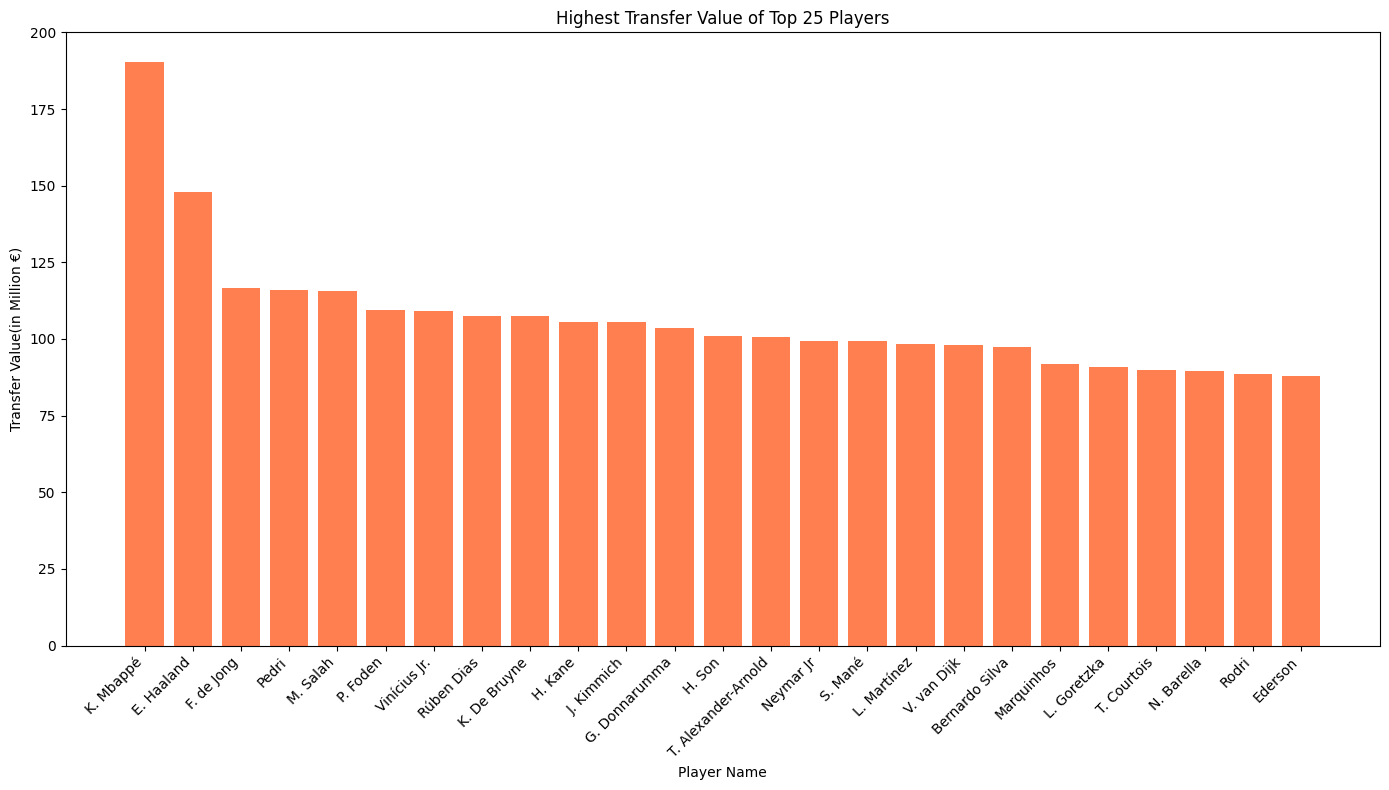

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(top_25_players['Name'],top_25_players['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Player Name')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Highest Transfer Value of Top 25 Players')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

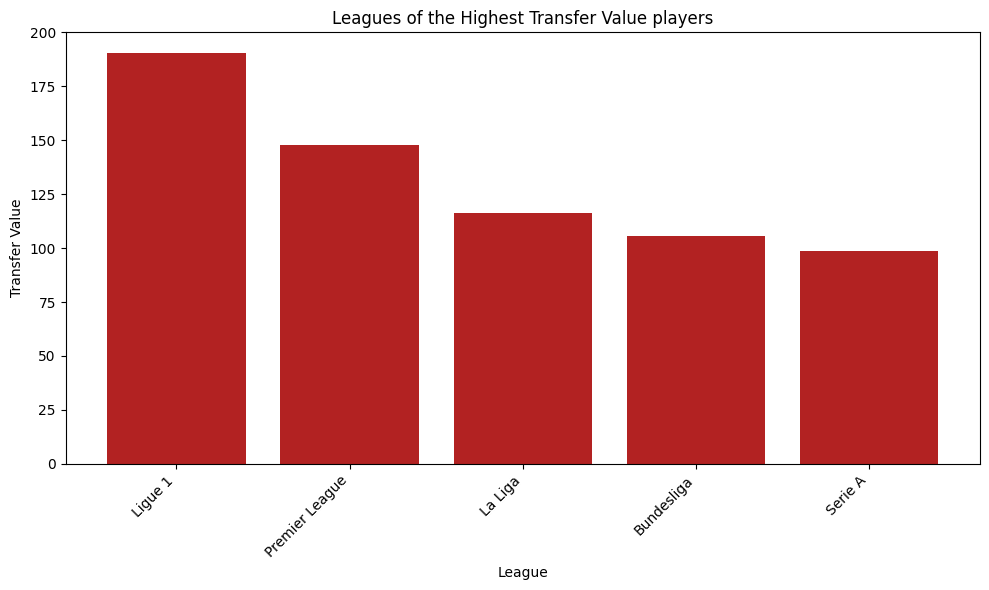

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_25_players['League'],top_25_players['Transfer Value (in Million €)'],color='firebrick')
plt.xlabel('League')
plt.ylabel('Transfer Value')
plt.title('Leagues of the Highest Transfer Value players')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

In [ ]:
leag=data['League'].value_counts()

In [ ]:
print(leag)

League
Others            13567
Premier League      766
La Liga             581
Bundesliga          501
Ligue 1             496
Serie A             453
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

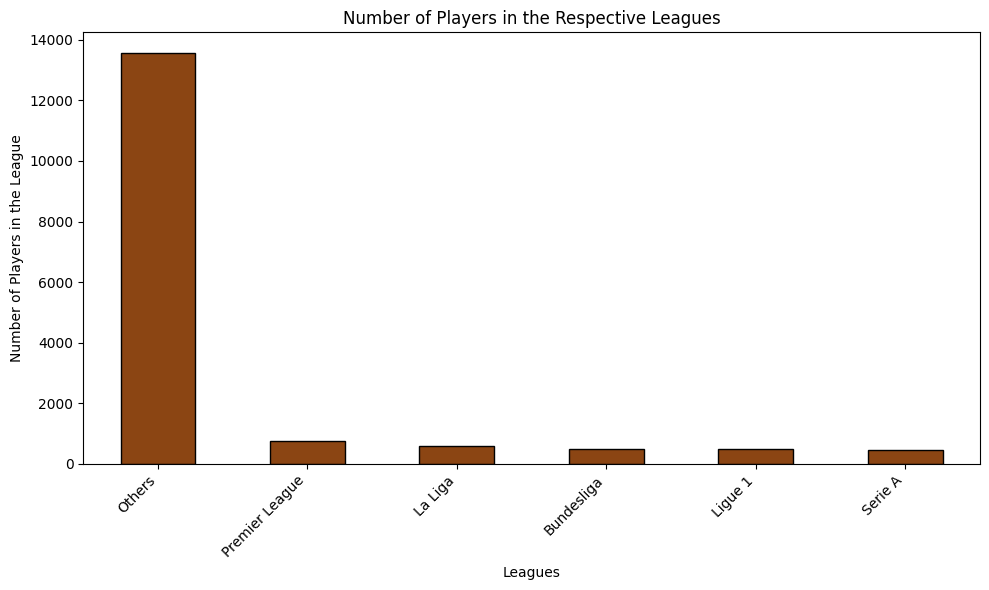

In [ ]:
plt.figure(figsize=(10, 6))
leag.plot(kind='bar',edgecolor='black',color='saddlebrown')
plt.xlabel('Leagues')
plt.ylabel('Number of Players in the League')
plt.title('Number of Players in the Respective Leagues')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

In [ ]:
nation = data['Nationality'].value_counts().head(25)
print(nation)

Nationality
England                1408
Germany                 980
Spain                   925
France                  787
Argentina               749
Brazil                  490
Italy                   443
Netherlands             433
Uruguay                 409
Japan                   369
Venezuela               341
Ecuador                 340
United States           317
China PR                315
Portugal                308
Turkey                  307
Poland                  306
Sweden                  304
Paraguay                296
Peru                    285
Norway                  283
Republic of Ireland     280
Korea Republic          277
Colombia                275
Romania                 273
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

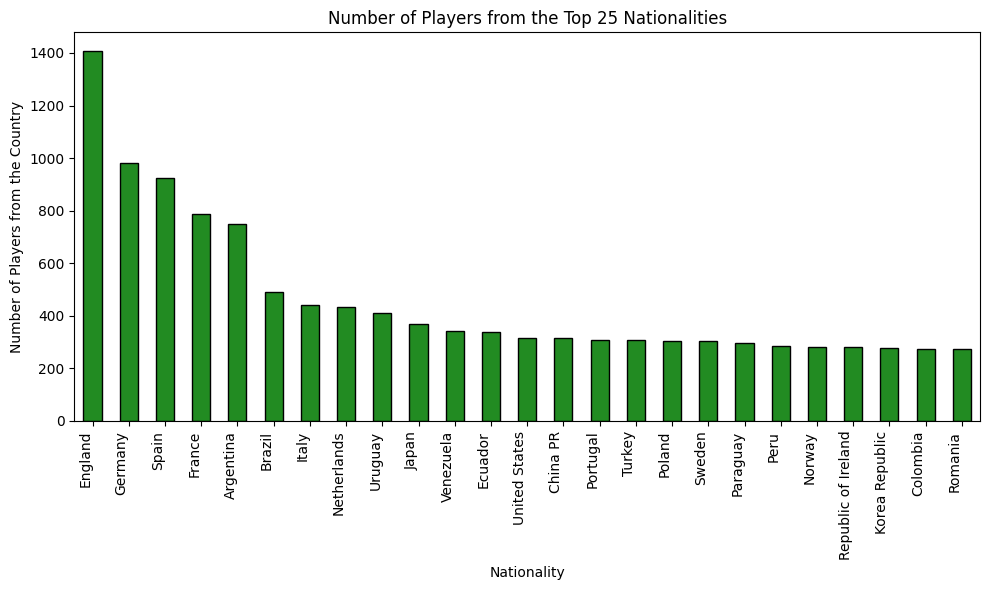

In [ ]:
plt.figure(figsize=(10, 6))
nation.plot(kind='bar',edgecolor='black',color='forestgreen')
plt.xlabel('Nationality')
plt.ylabel('Number of Players from the Country')
plt.title('Number of Players from the Top 25 Nationalities')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show

In [ ]:
position = data['Position'].value_counts().head(15)
print(position)

Position
SUB    6783
RES    5065
RCB     406
LCB     360
GK      328
ST      316
LB      306
RB      304
RCM     299
LCM     284
RM      262
LM      250
CAM     182
LS      145
LW      136
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

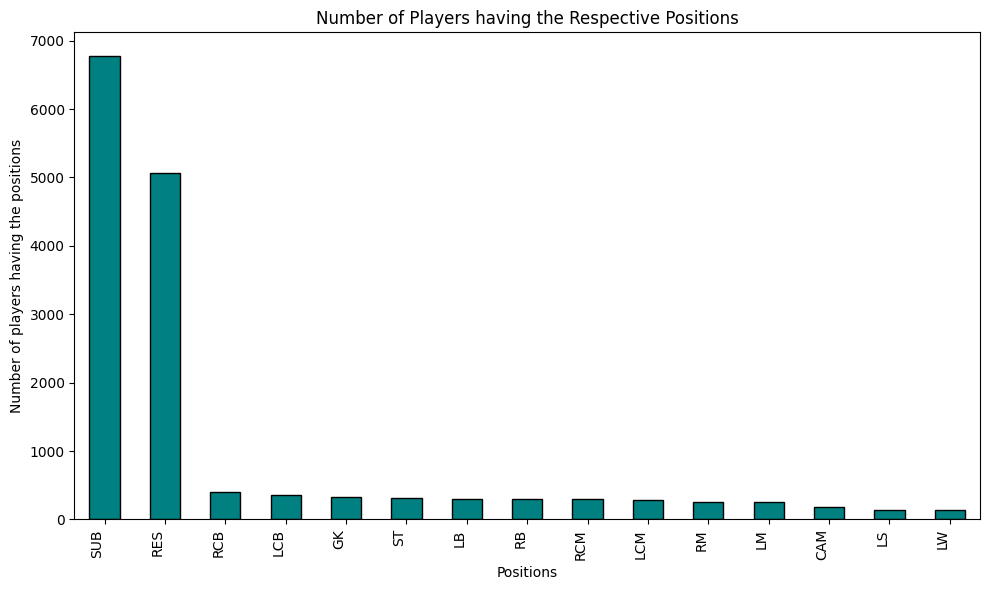

In [ ]:
plt.figure(figsize=(10, 6))
position.plot(kind='bar',edgecolor='black',color='teal')
plt.xlabel('Positions')
plt.ylabel('Number of players having the positions')
plt.title('Number of Players having the Respective Positions')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show

In [ ]:
foot = data['Preferred Foot'].value_counts()
print(foot)

Preferred Foot
Right    12661
Left      3703
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

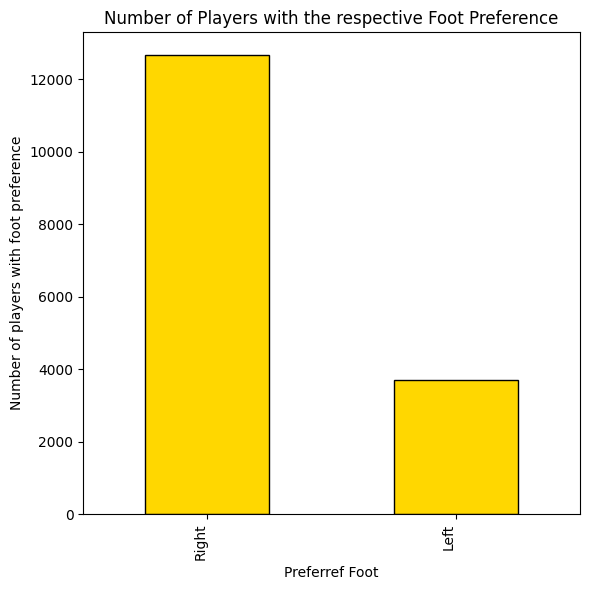

In [ ]:
plt.figure(figsize=(6,6))
foot.plot(kind='bar',edgecolor='black',color='gold')
plt.xlabel('Preferref Foot')
plt.ylabel('Number of players with foot preference')
plt.title('Number of Players with the respective Foot Preference')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show

In [ ]:
height = data['Height (in cm)'].value_counts().head(25)
print(height)

Height (in cm)
180    1338
178    1109
175    1094
185    1003
183     945
182     764
188     707
184     667
177     621
186     620
176     597
181     594
187     565
179     551
173     537
190     528
170     509
174     466
172     424
189     361
191     343
193     268
192     262
171     242
168     186
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

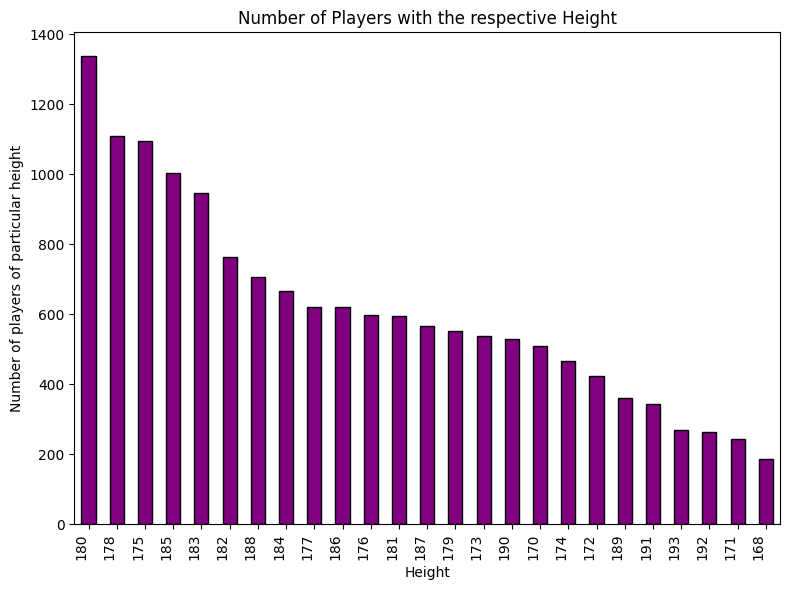

In [ ]:
plt.figure(figsize=(8,6))
height.plot(kind='bar',edgecolor='black',color='purple')
plt.xlabel('Height')
plt.ylabel('Number of players of particular height')
plt.title('Number of Players with the respective Height')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show

In [ ]:
age = data['Age'].value_counts().head(25)
print(age)

Age
19    1824
20    1821
21    1745
22    1563
18    1402
23    1145
24    1019
25     872
26     729
17     667
27     643
28     548
29     486
30     431
31     342
32     266
33     211
34     179
16     154
35     111
36      93
37      55
38      23
39      22
40       7
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

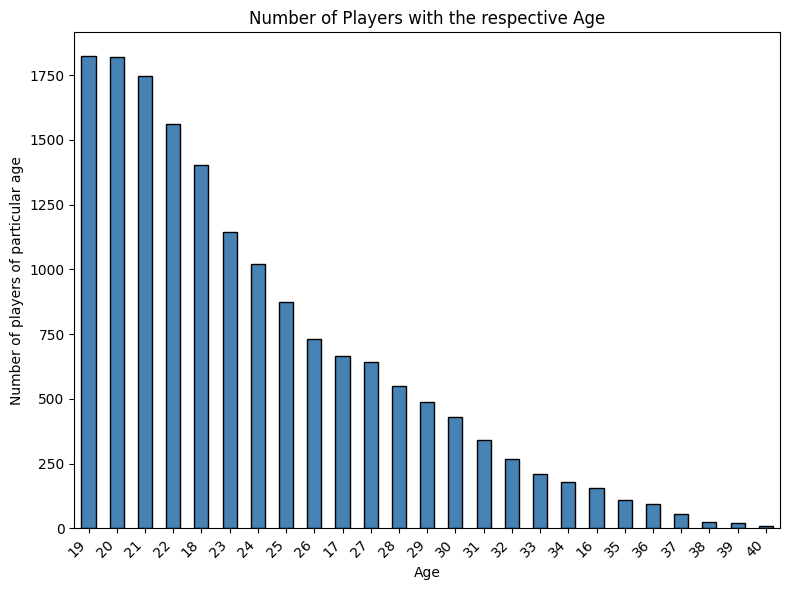

In [ ]:
plt.figure(figsize=(8,6))
age.plot(kind='bar',edgecolor='black',color='steelblue')
plt.xlabel('Age')
plt.ylabel('Number of players of particular age')
plt.title('Number of Players with the respective Age')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

In [ ]:
# corr_matrix = data.corr()
corr_matrix = data.select_dtypes(include=['number']).corr()


In [ ]:
# corr_matrix = data.corr()

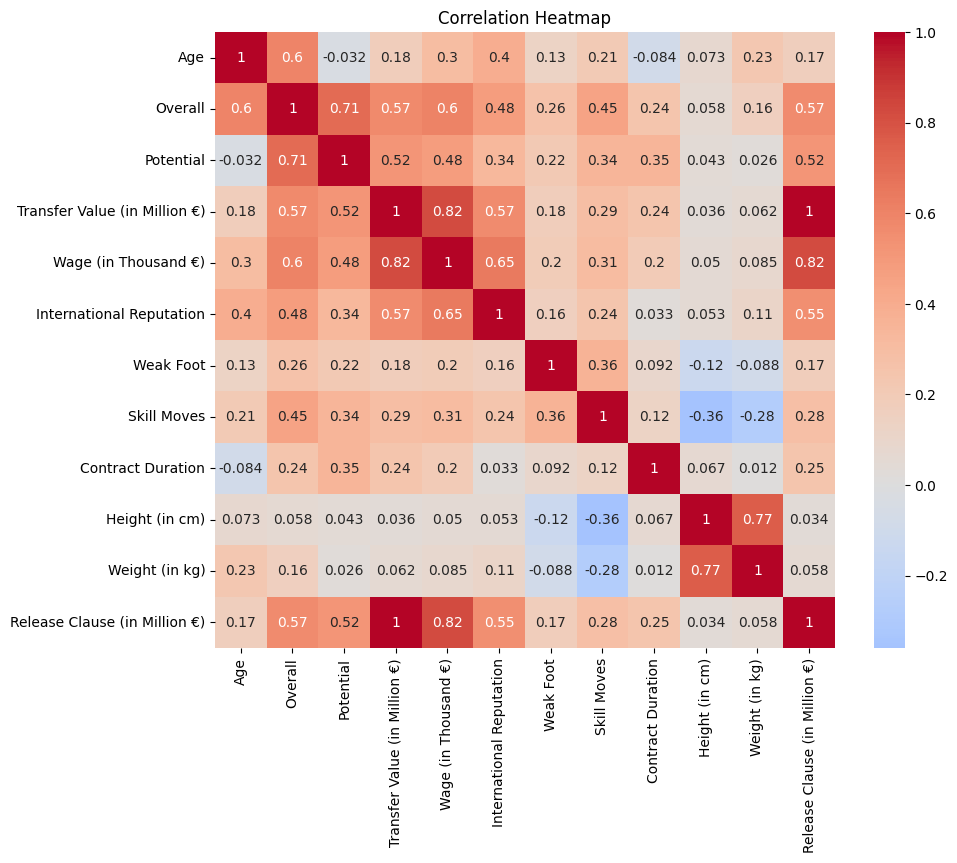

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

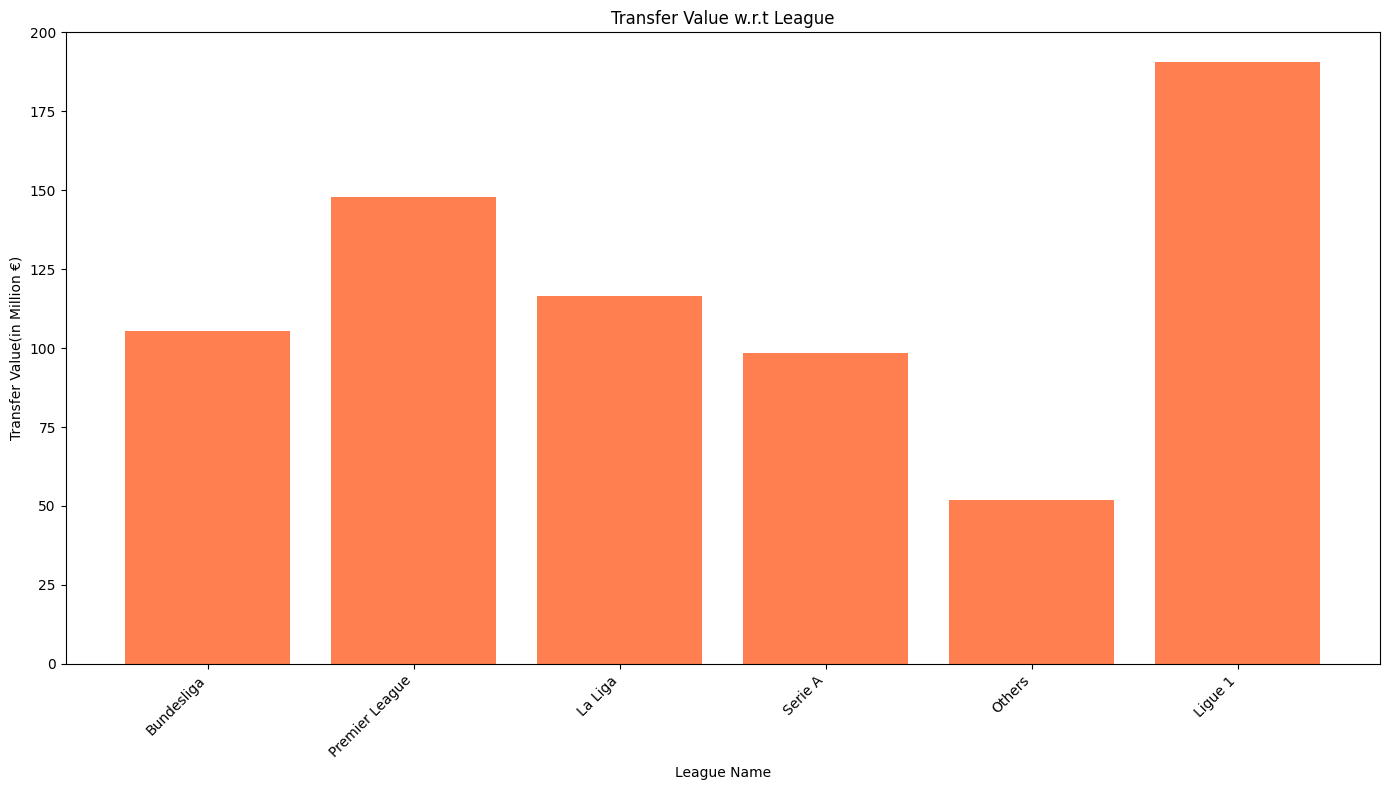

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['League'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('League Name')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t League')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

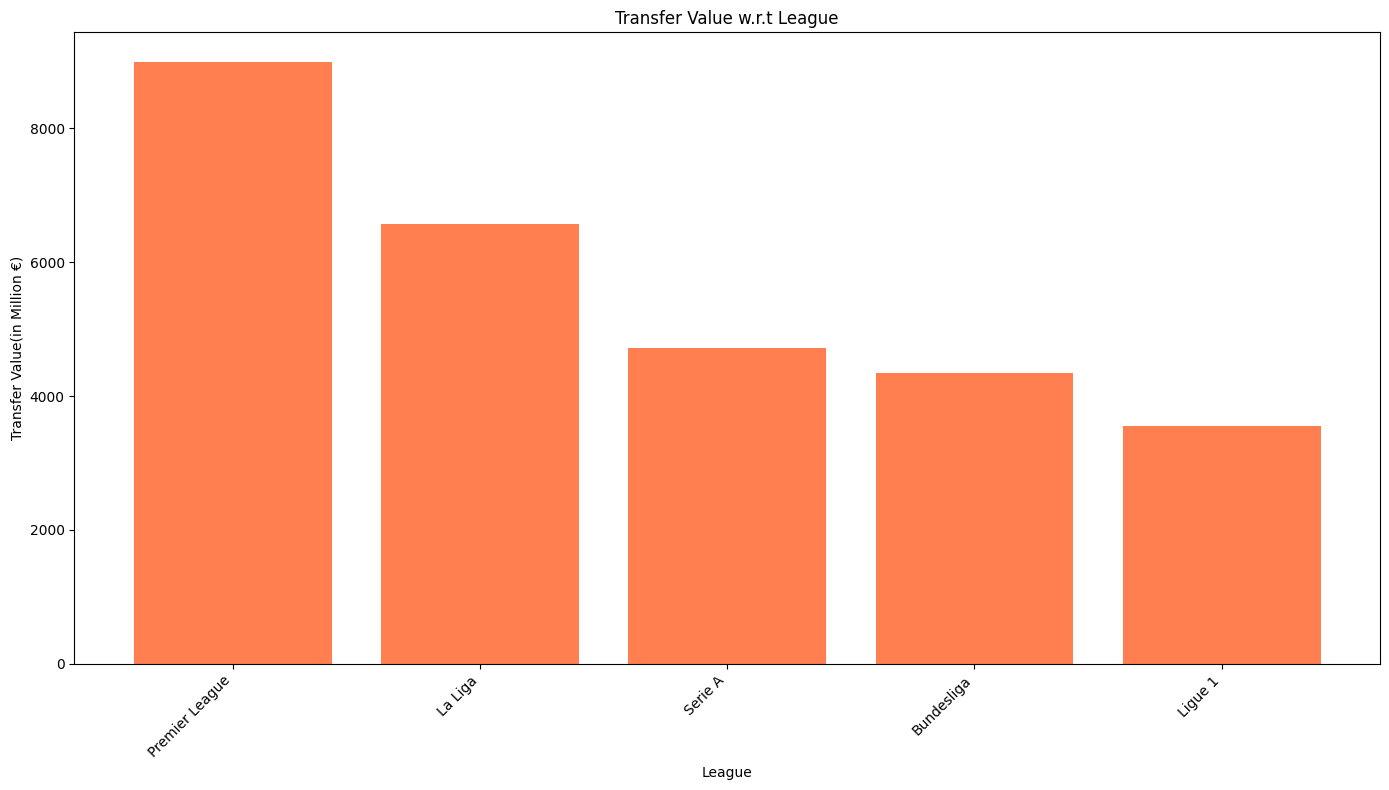

In [ ]:
top_leagues = data.groupby('League').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)
top_leagues = top_leagues[top_leagues.index != 'Others'].head(25)

plt.figure(figsize=(14, 8))
plt.bar(top_leagues.index,top_leagues['Transfer Value (in Million €)'],color='coral')
plt.xlabel('League')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t League')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

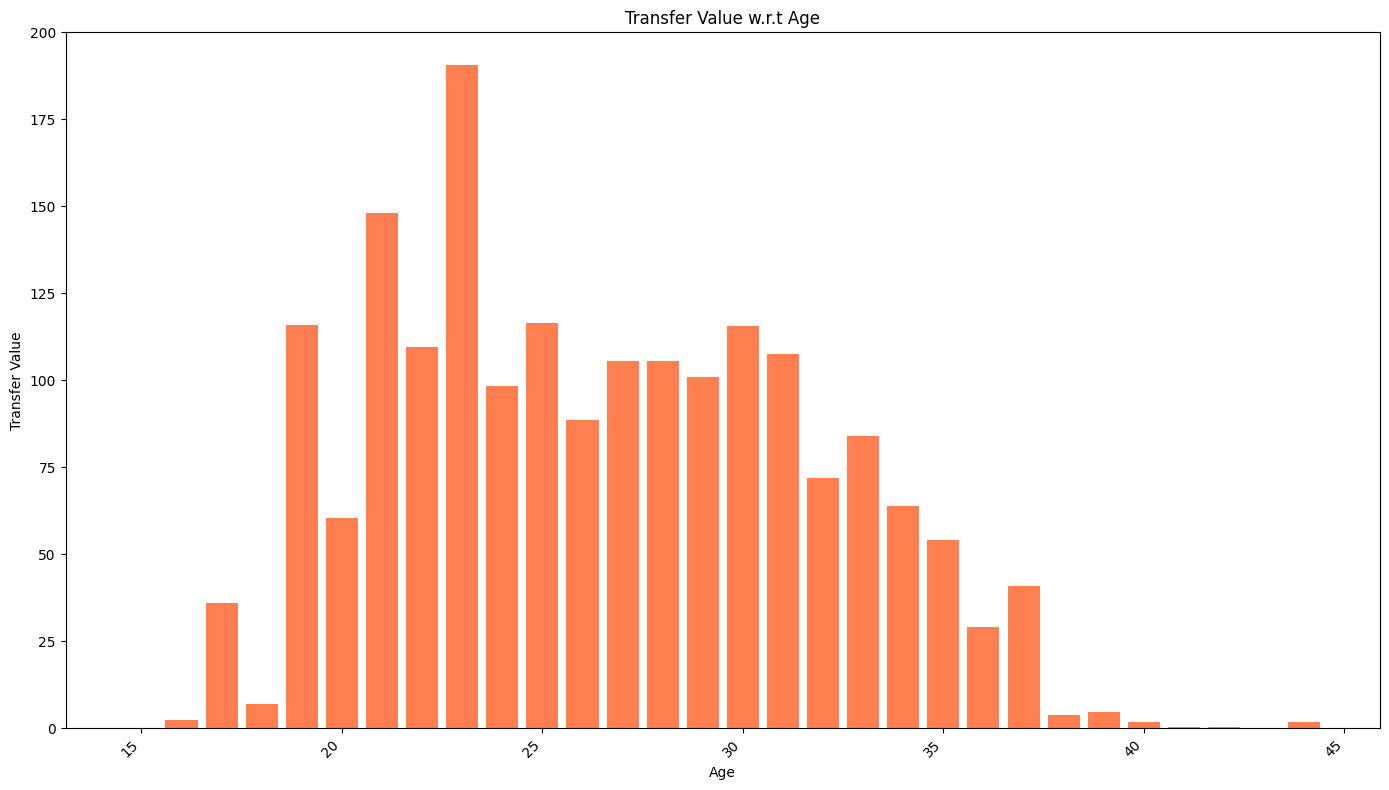

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Age'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Age')
plt.ylabel('Transfer Value')
plt.title('Transfer Value w.r.t Age')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

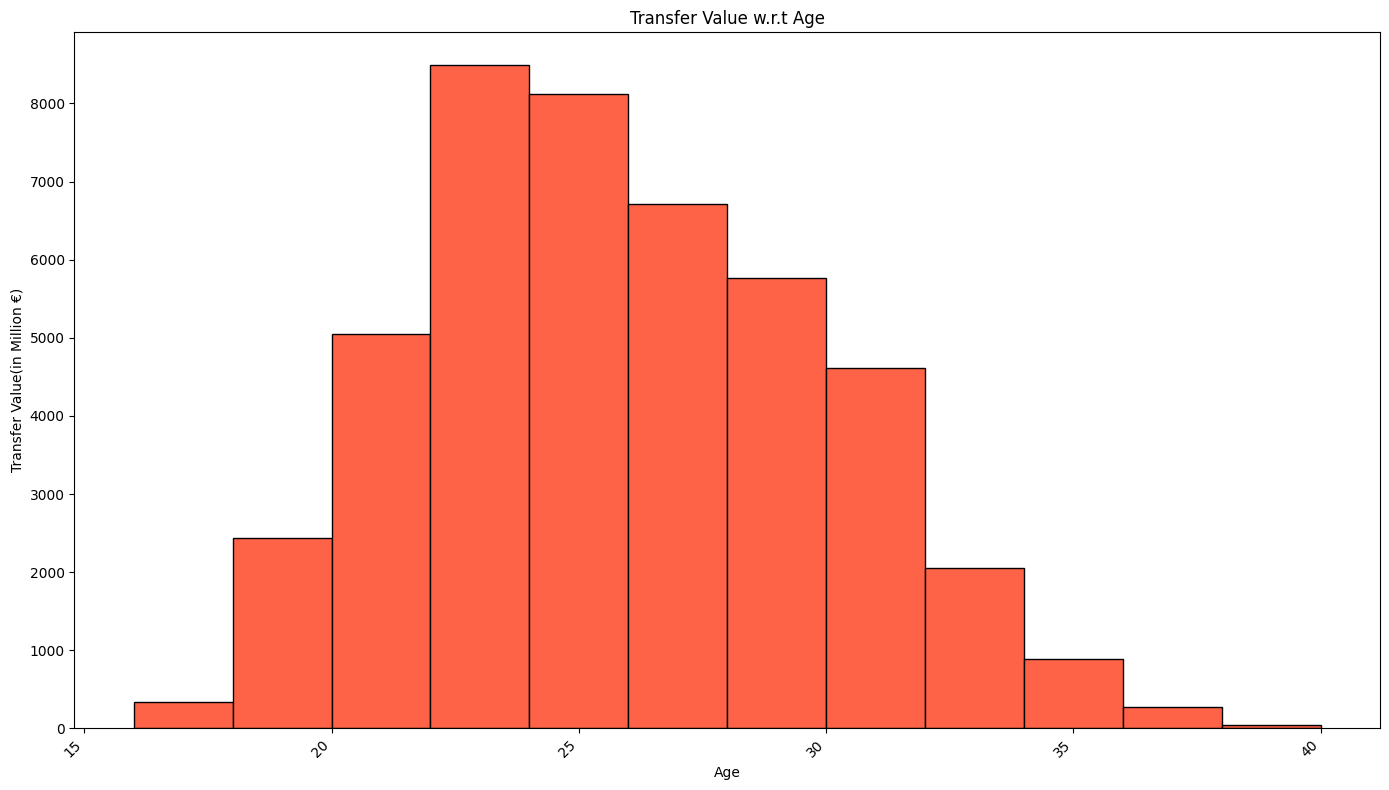

In [ ]:
top_ages = data.groupby('Age').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.hist(top_ages.index, bins=12, weights=top_ages['Transfer Value (in Million €)'], color='tomato', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Age')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

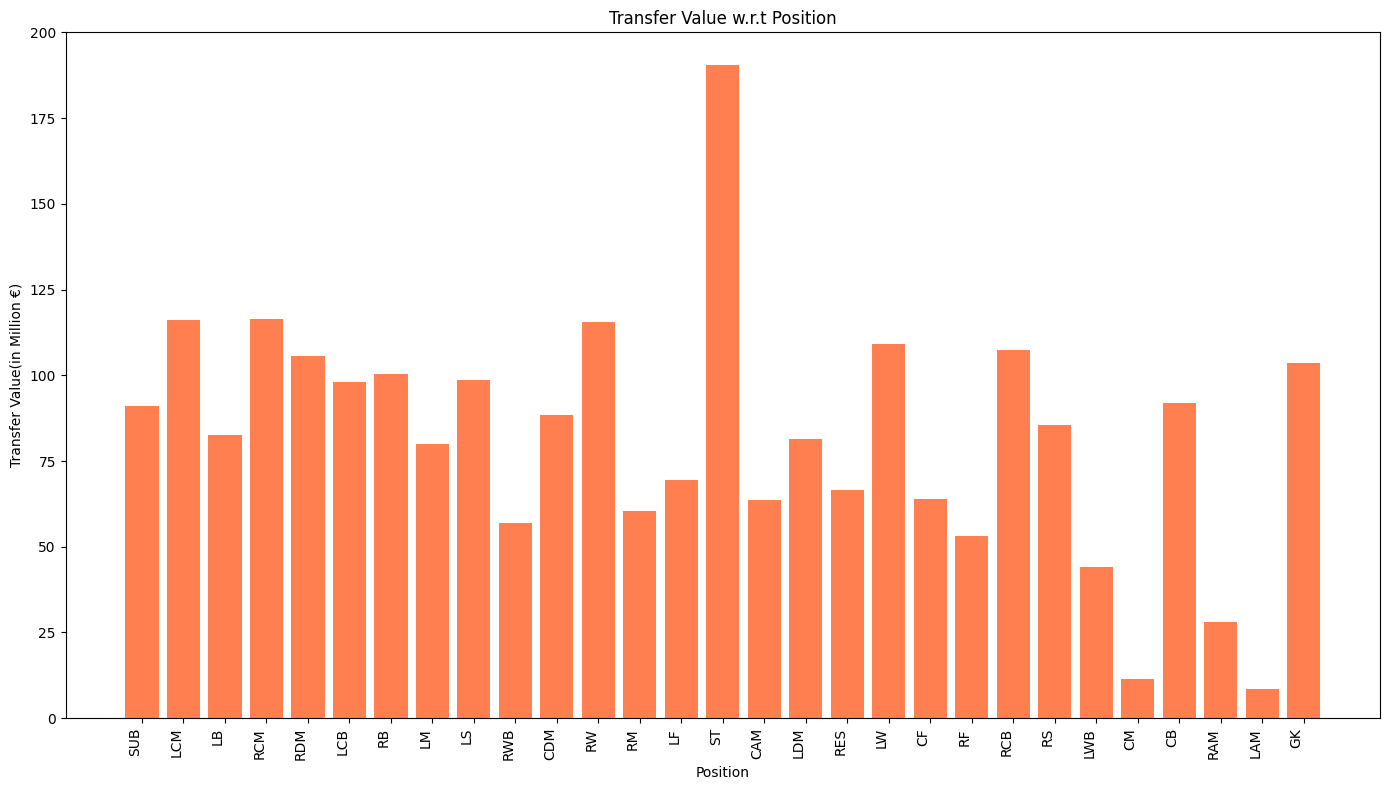

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Position'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Position')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Position')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

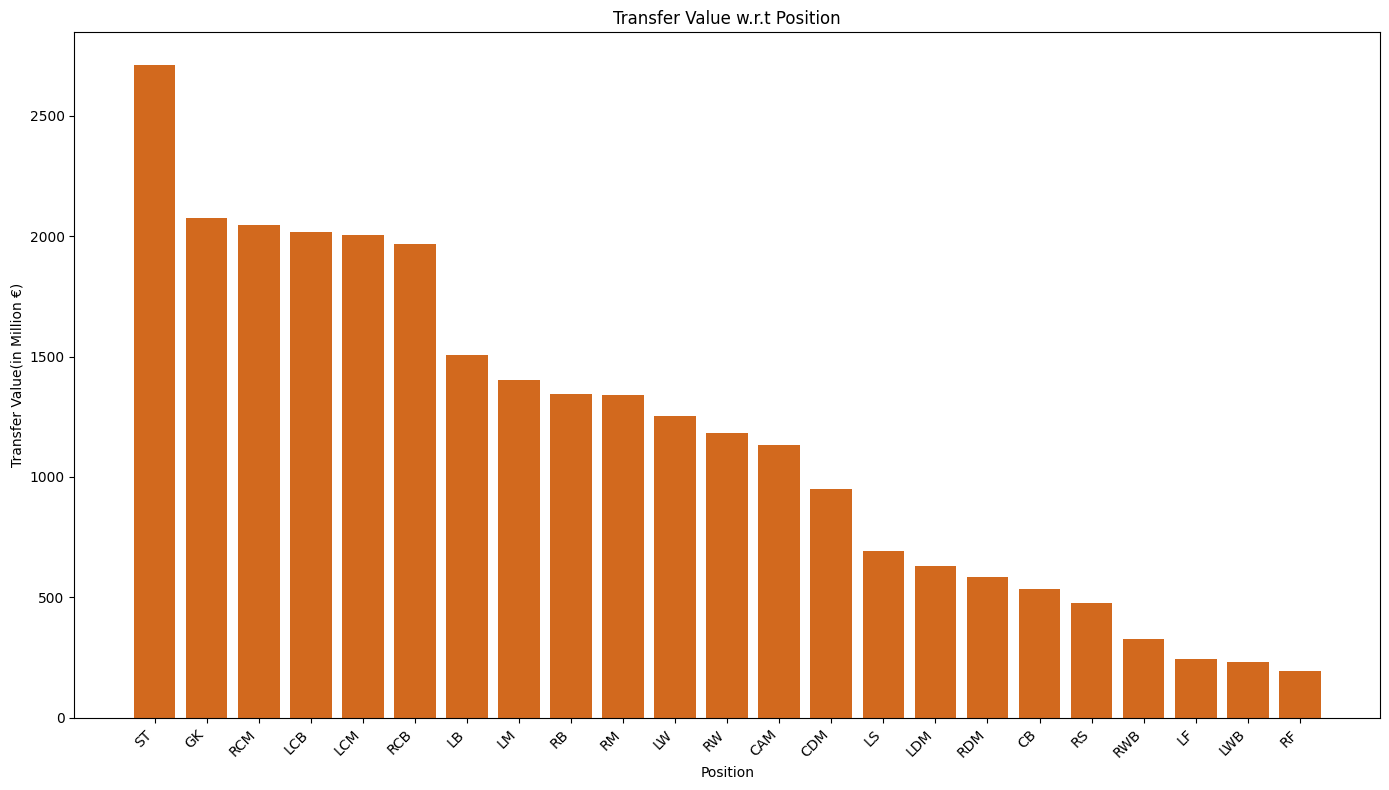

In [ ]:
top_pos = data.groupby('Position').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)
top_pos = top_pos.drop(['SUB', 'RES'], errors='ignore')

plt.figure(figsize=(14, 8))
plt.bar(top_pos.index,top_pos['Transfer Value (in Million €)'],color='chocolate')
plt.xlabel('Position')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Position')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

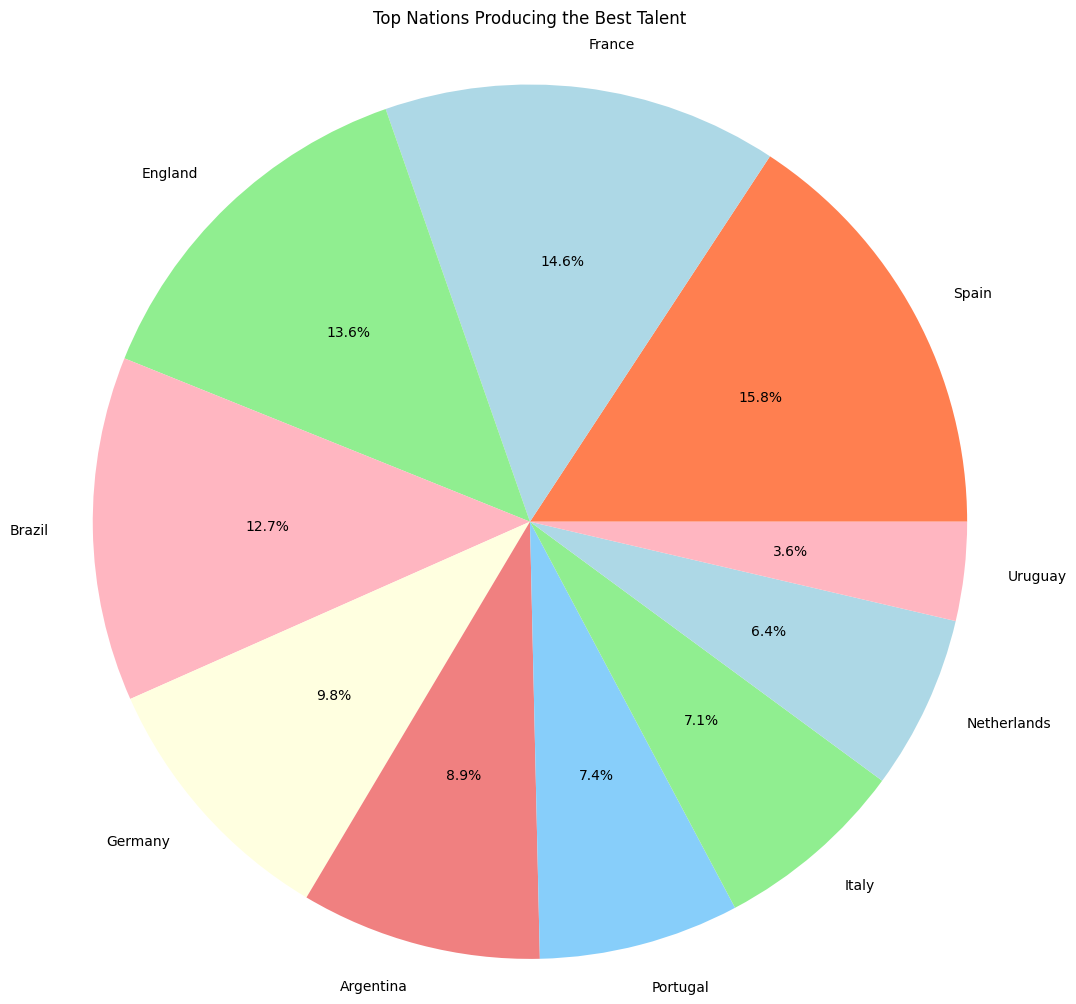

In [ ]:
top_countries = data.groupby('Nationality').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_countries['Transfer Value (in Million €)'], labels=top_countries.index, autopct='%1.1f%%', colors=['coral', 'lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightblue', 'lightpink'])
plt.title('Top Nations Producing the Best Talent', y=1.03)
plt.tight_layout()
plt.axis('equal')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

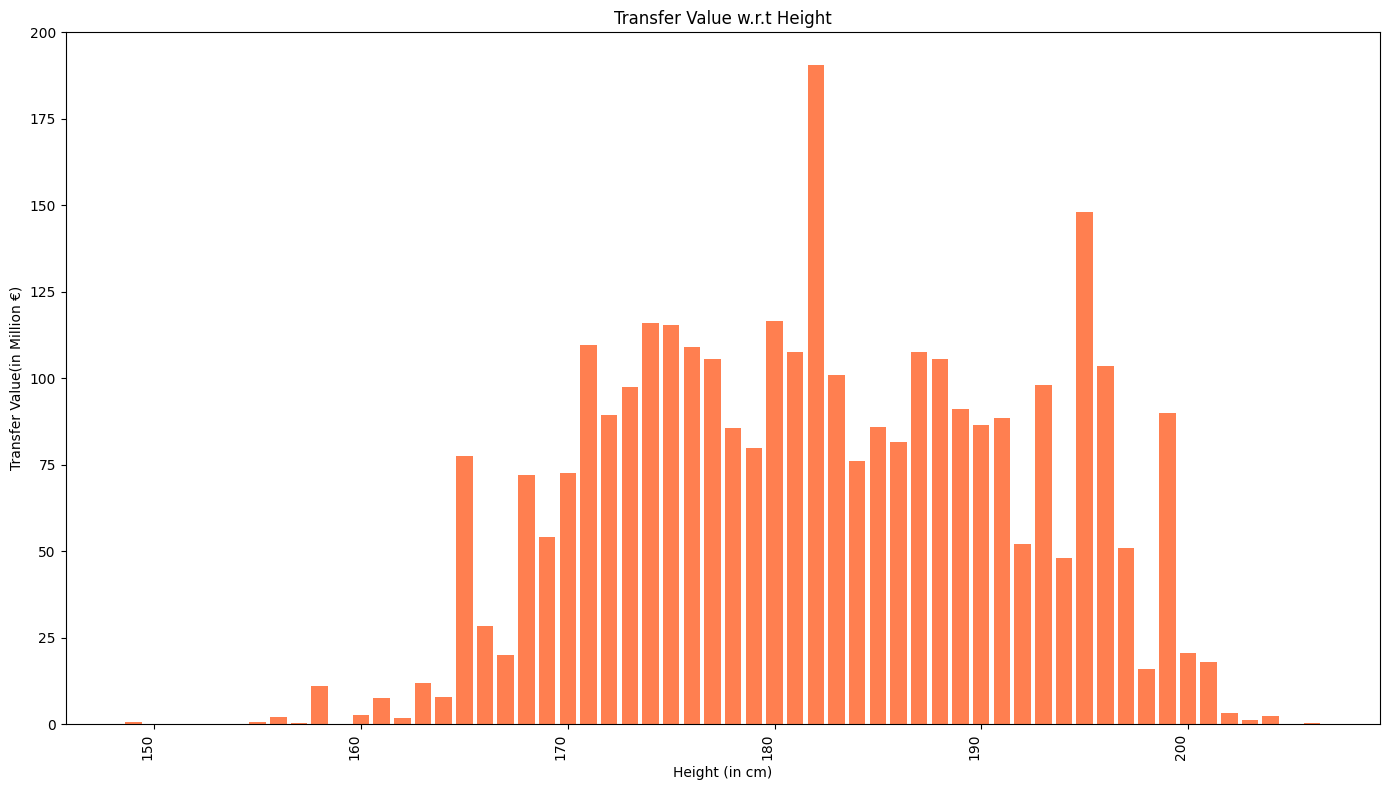

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Height (in cm)'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Height (in cm)')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Height')
plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

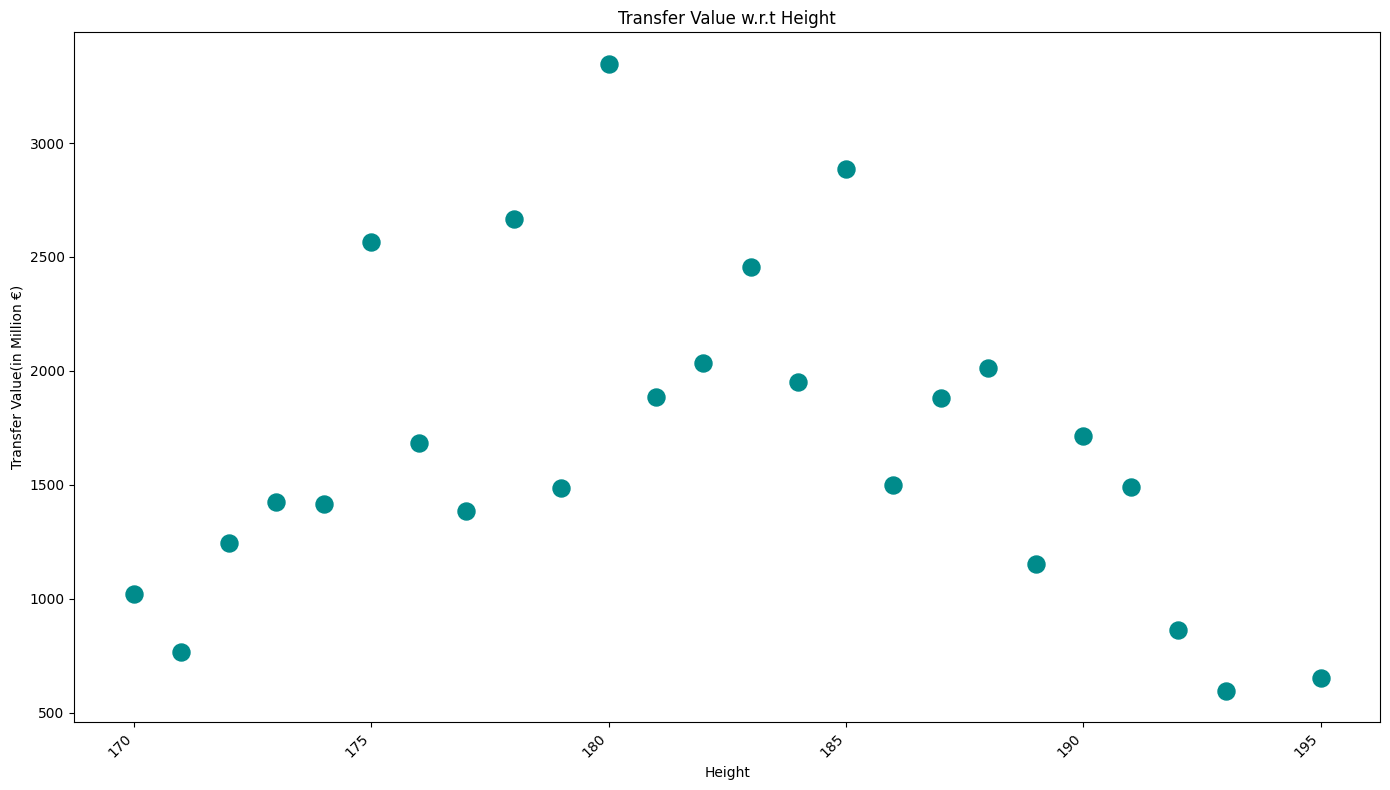

In [ ]:
top_height = data.groupby('Height (in cm)').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.scatter(top_height.index, top_height['Transfer Value (in Million €)'], color='darkcyan', marker='o', s=150)
plt.xlabel('Height')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Height')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

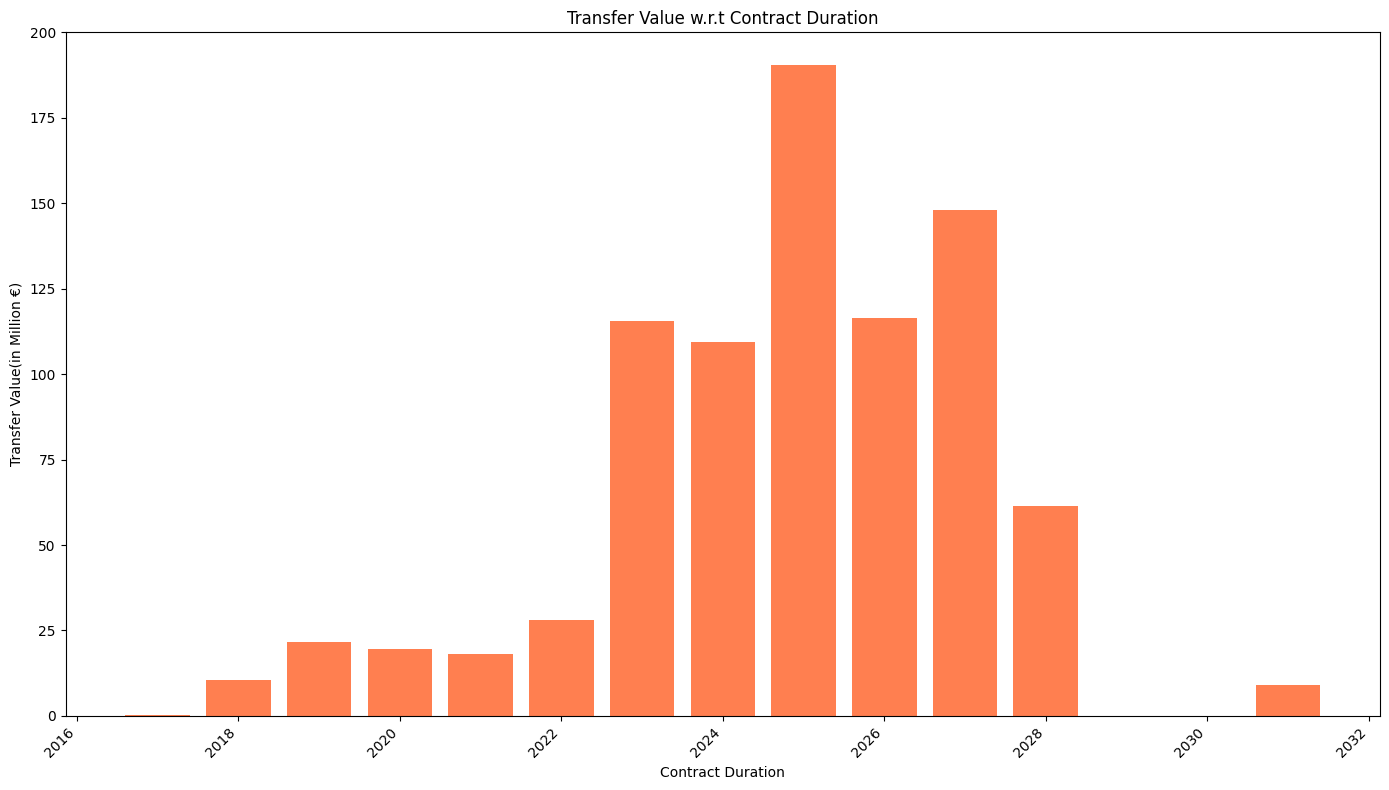

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Contract Duration'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Contract Duration')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Contract Duration')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

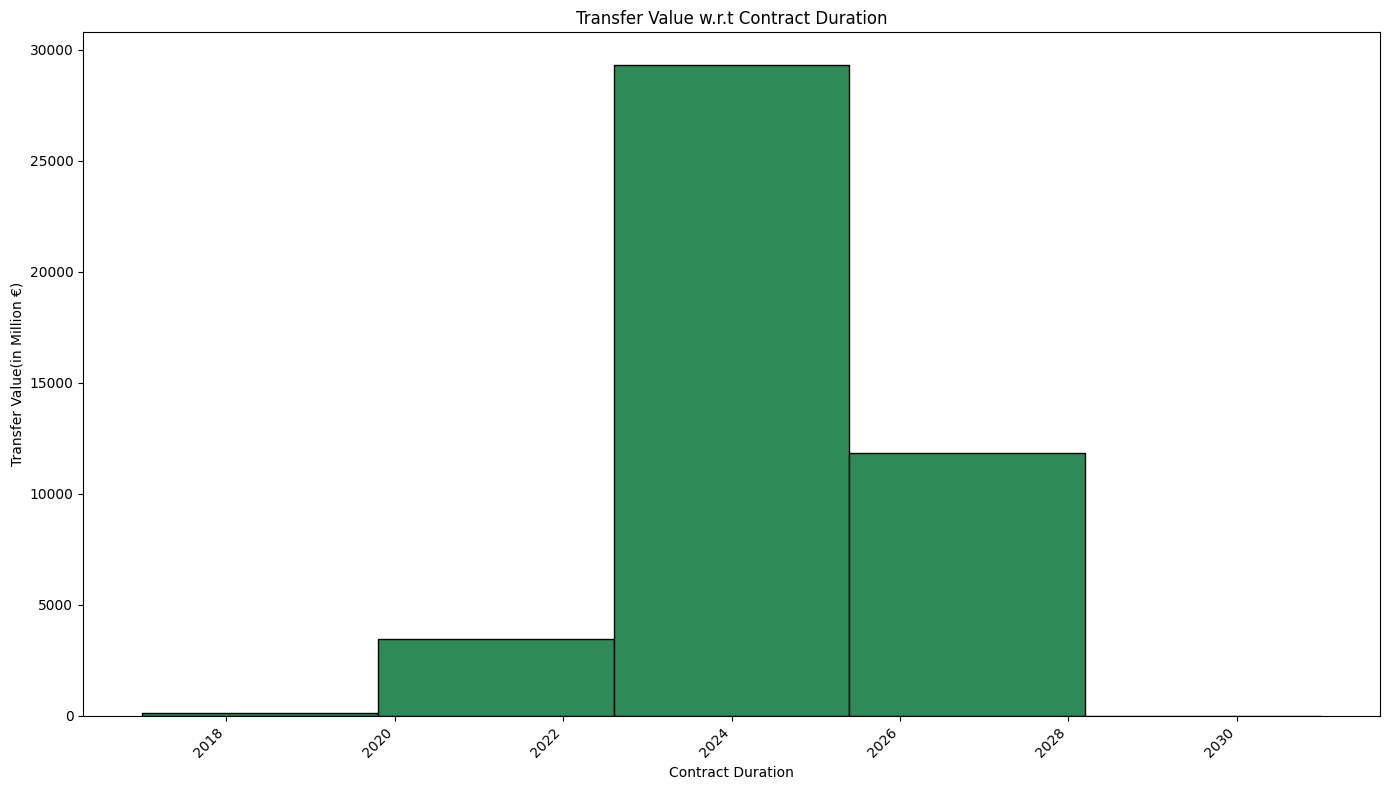

In [ ]:
top_contract = data.groupby('Contract Duration').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.hist(top_contract.index, bins=5, weights=top_contract['Transfer Value (in Million €)'], color='seagreen', edgecolor='black')
plt.xlabel('Age')
plt.xlabel('Contract Duration')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Contract Duration')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

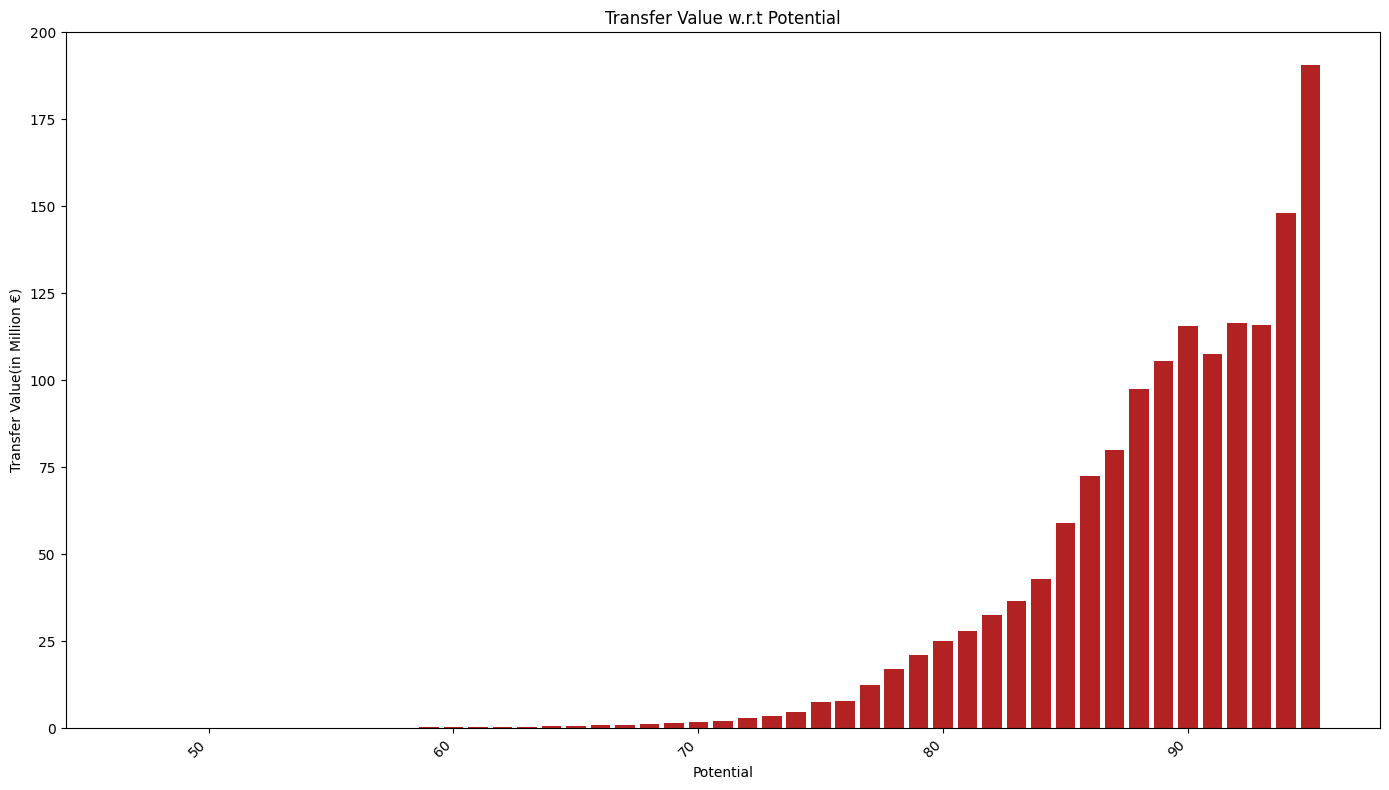

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Potential'],data['Transfer Value (in Million €)'],color='firebrick')
plt.xlabel('Potential')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Potential')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

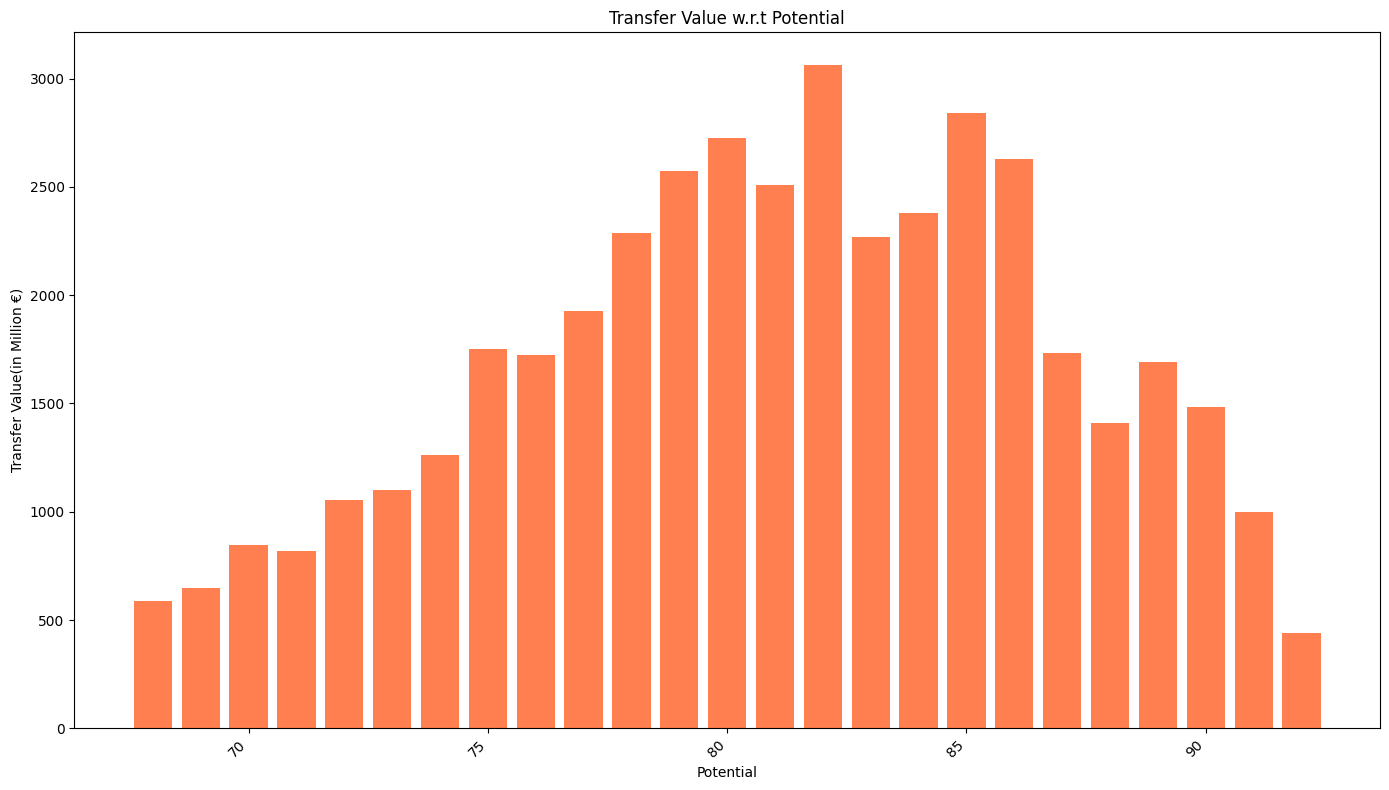

In [ ]:
top_pot = data.groupby('Potential').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.bar(top_pot.index,top_pot['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Potential')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Potential')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

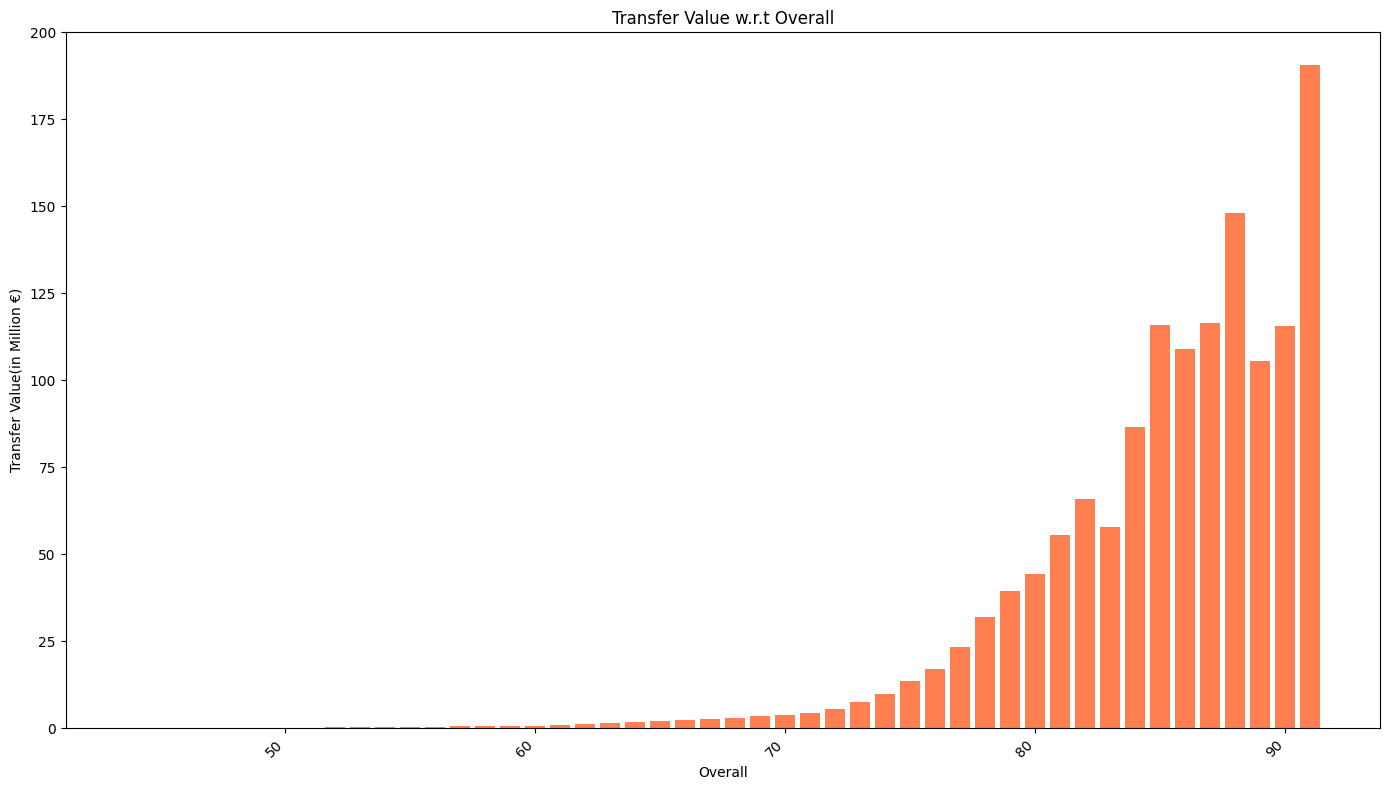

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Overall'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Overall')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Overall')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

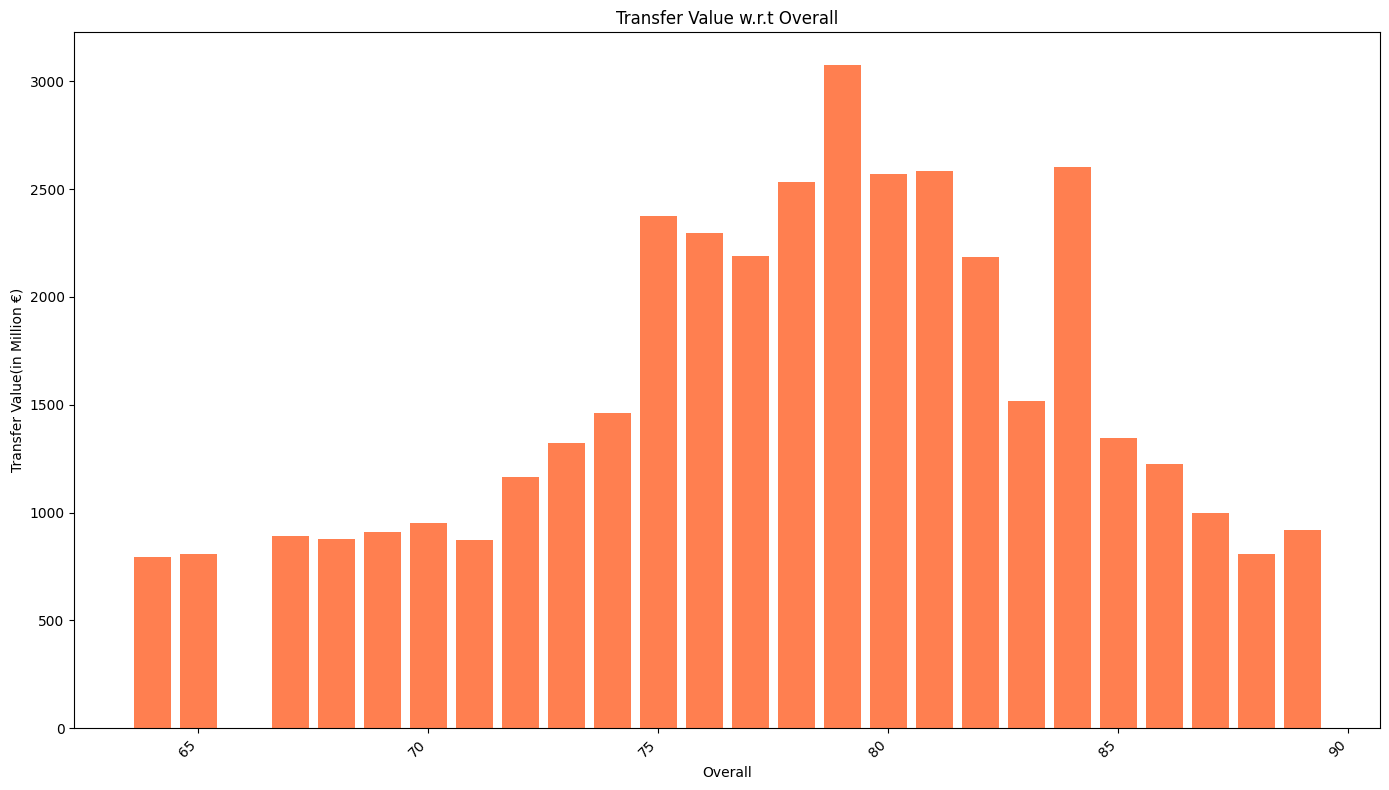

In [ ]:
top_over = data.groupby('Overall').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.bar(top_over.index,top_over['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Overall')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Overall')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

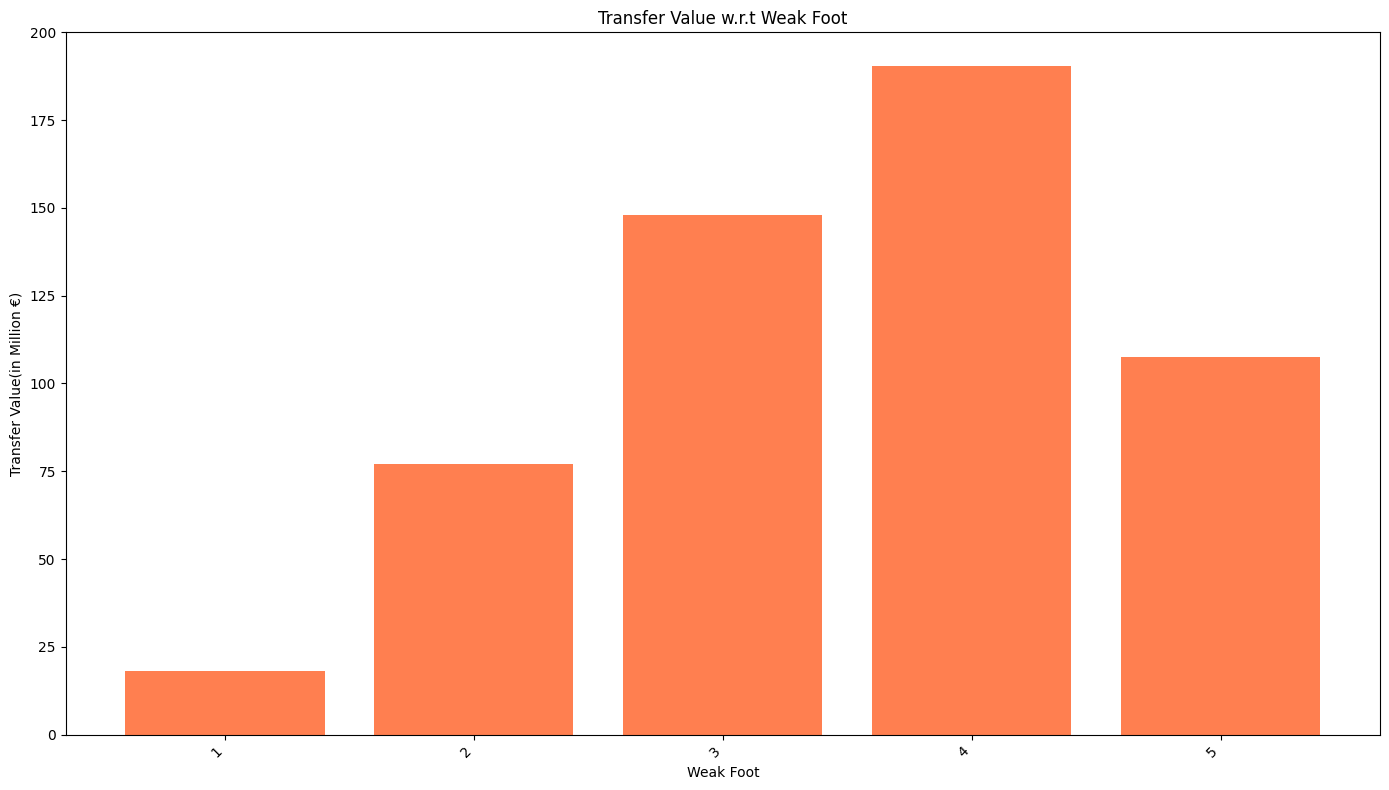

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Weak Foot'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Weak Foot')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Weak Foot')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

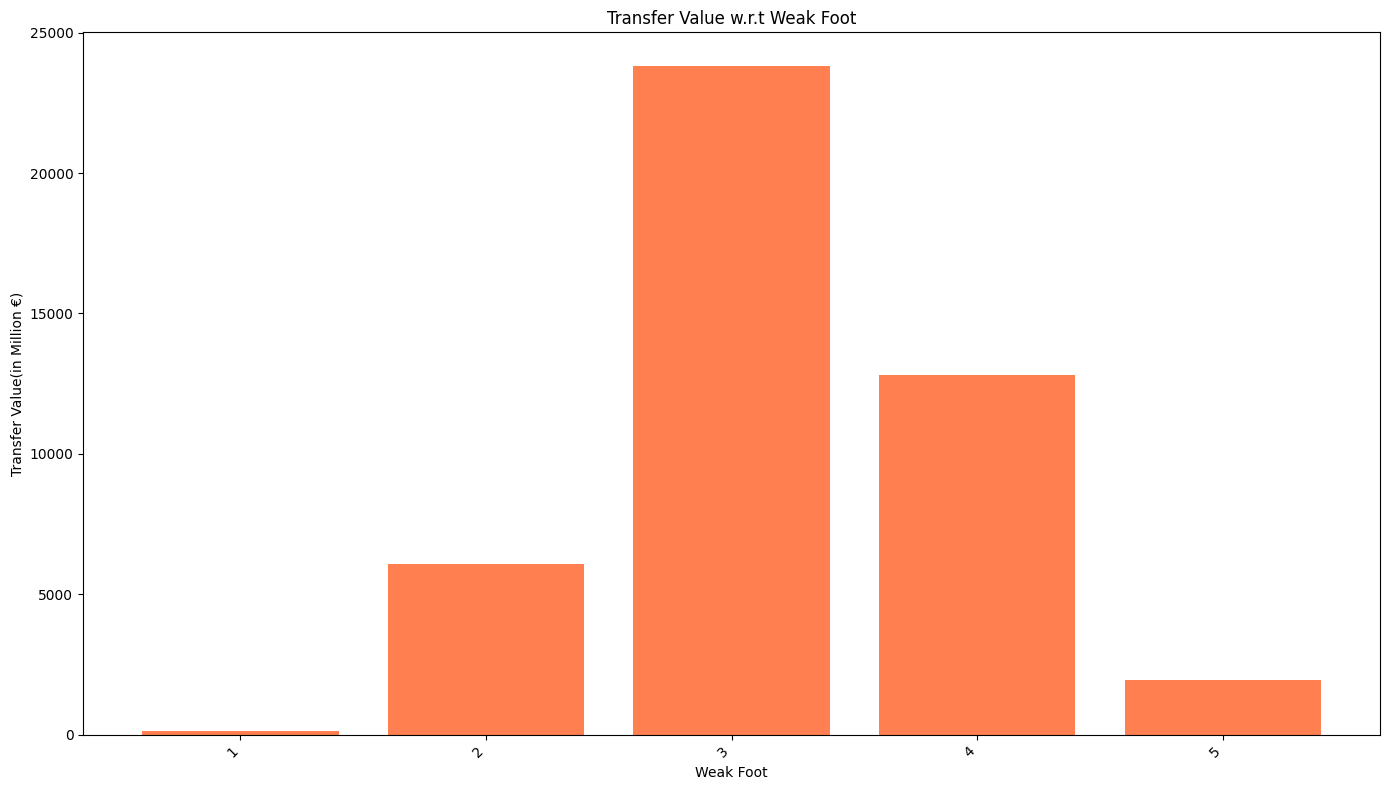

In [ ]:
weak_foot = data.groupby('Weak Foot').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.bar(weak_foot.index,weak_foot['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Weak Foot')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Weak Foot')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

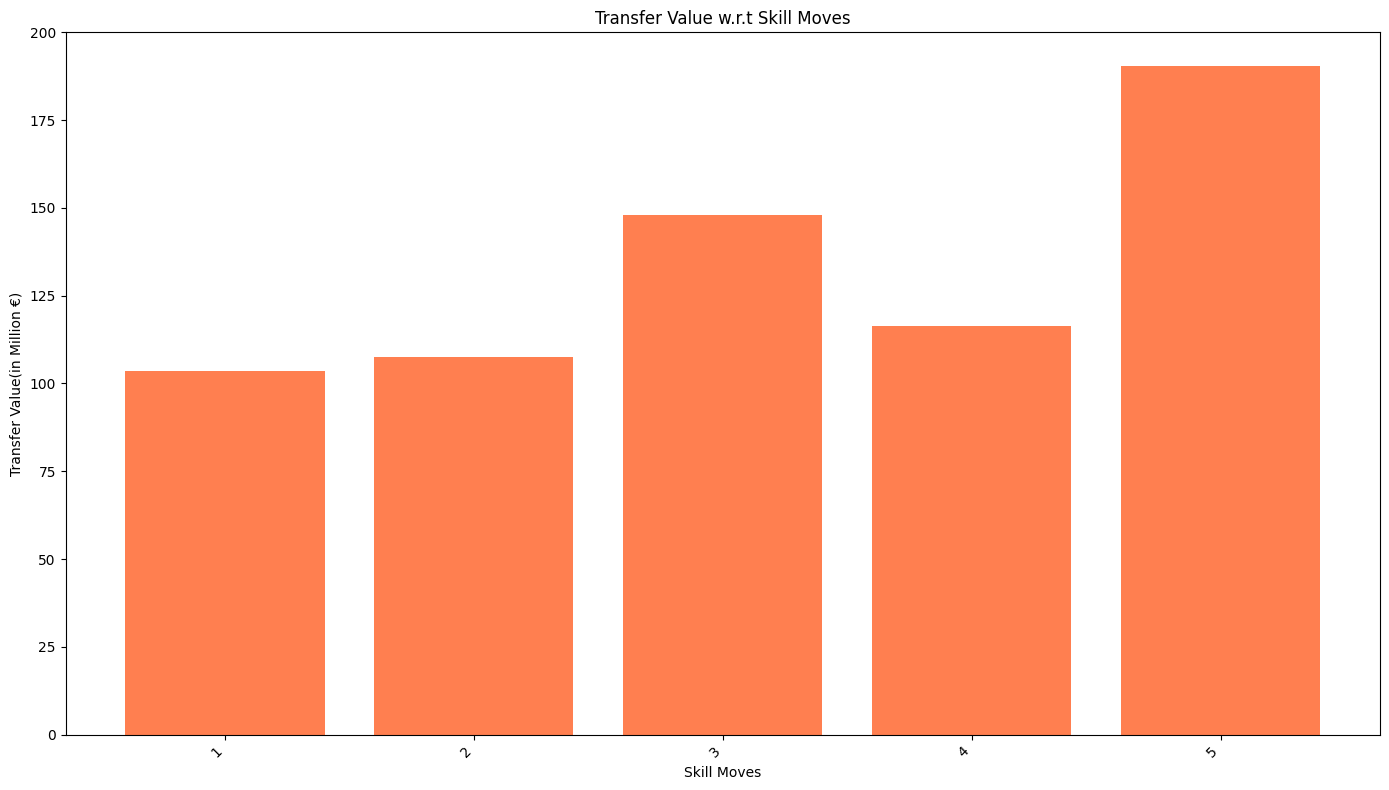

In [ ]:
plt.figure(figsize=(14, 8))
plt.bar(data['Skill Moves'],data['Transfer Value (in Million €)'],color='coral')
plt.xlabel('Skill Moves')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Skill Moves')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

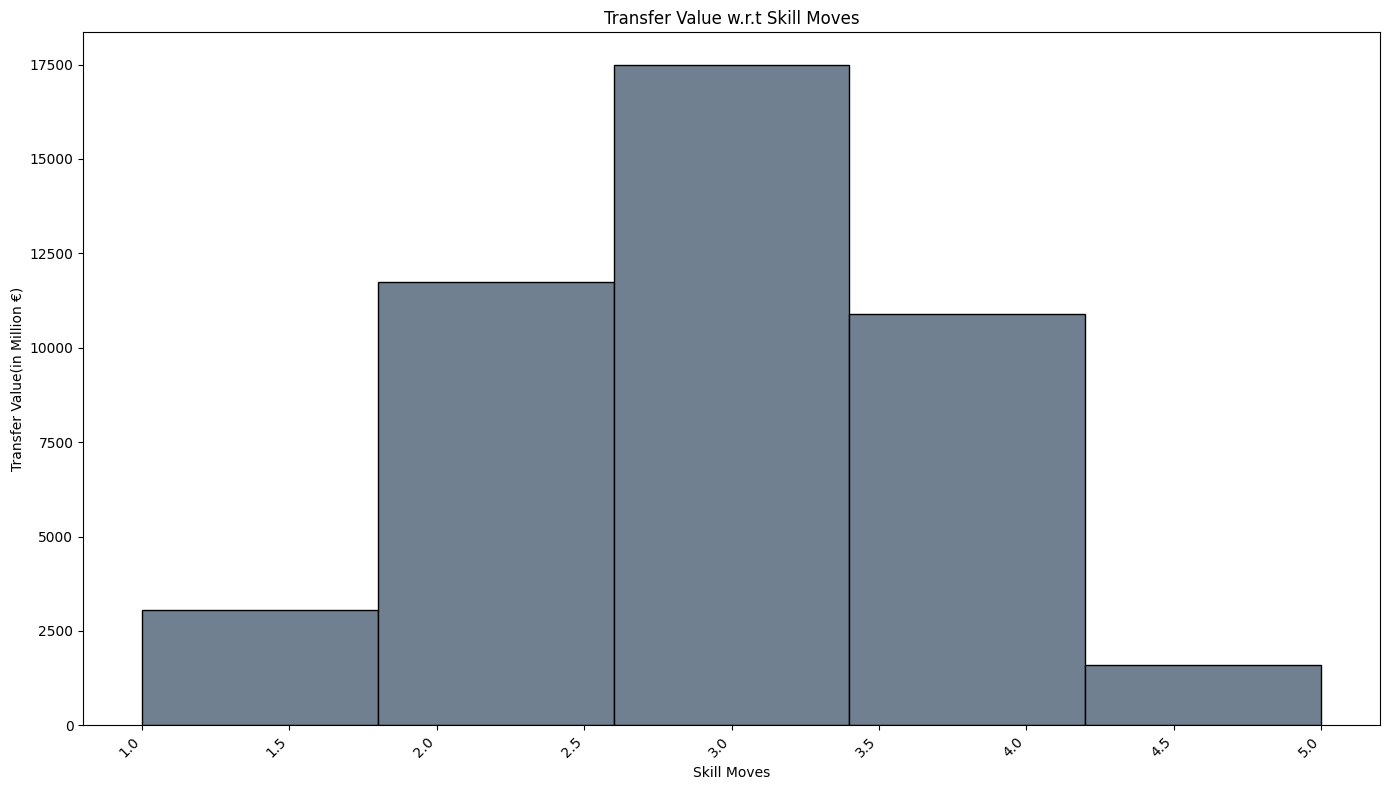

In [ ]:
skill_moves = data.groupby('Skill Moves').agg({'Transfer Value (in Million €)': 'sum'}).sort_values(by='Transfer Value (in Million €)', ascending=False).head(25)

plt.figure(figsize=(14, 8))
plt.hist(skill_moves.index, bins=5, weights=skill_moves['Transfer Value (in Million €)'], color='slategrey', edgecolor='black')
plt.xlabel('Skill Moves')
plt.ylabel('Transfer Value(in Million €)')
plt.title('Transfer Value w.r.t Skill Moves')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

In [ ]:
data.head(5)

,Name,Age,Nationality,Overall,Potential,Club,League,Transfer Value (in Million €),Wage (in Thousand €),Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Duration,Height (in cm),Weight (in kg),Release Clause (in Million €)
0,L. Goretzka,27,Germany,87,88,FC Bayern München,Bundesliga,91.0,115.0,SUB,Right,4,4,3,High/ Medium,Unique,2026,189,82,157.0
1,Bruno Fernandes,27,Portugal,86,87,Manchester United,Premier League,78.5,190.0,LCM,Right,3,3,4,High/ High,Unique,2026,179,69,155.0
2,M. Acuña,30,Argentina,85,85,Sevilla FC,La Liga,46.5,46.0,LB,Left,2,3,3,High/ High,Stocky (170-185),2024,172,69,97.7
3,K. De Bruyne,31,Belgium,91,91,Manchester City,Premier League,107.5,350.0,RCM,Right,4,5,4,High/ High,Unique,2025,181,70,198.9
4,N. Barella,25,Italy,86,89,Inter,Serie A,89.5,110.0,RCM,Right,3,3,3,High/ High,Normal (170-),2026,172,68,154.4


In [ ]:
# Dropping unnecessary columns
data = data.drop(['Overall','International Reputation','Skill Moves','Preferred Foot','Weak Foot','Work Rate',
                  'Body Type','Weight (in kg)'],axis=1)

In [ ]:
data.head(10)

,Name,Age,Nationality,Potential,Club,League,Transfer Value (in Million €),Wage (in Thousand €),Position,Contract Duration,Height (in cm),Release Clause (in Million €)
0,L. Goretzka,27,Germany,88,FC Bayern München,Bundesliga,91.0,115.0,SUB,2026,189,157.0
1,Bruno Fernandes,27,Portugal,87,Manchester United,Premier League,78.5,190.0,LCM,2026,179,155.0
2,M. Acuña,30,Argentina,85,Sevilla FC,La Liga,46.5,46.0,LB,2024,172,97.7
3,K. De Bruyne,31,Belgium,91,Manchester City,Premier League,107.5,350.0,RCM,2025,181,198.9
4,N. Barella,25,Italy,89,Inter,Serie A,89.5,110.0,RCM,2026,172,154.4
5,J. Kimmich,27,Germany,90,FC Bayern München,Bundesliga,105.5,130.0,RDM,2025,177,182.0
6,D. Alaba,30,Austria,86,Real Madrid CF,La Liga,55.5,220.0,LCB,2026,180,113.8
7,22 Paulinho,32,Brazil,83,Al Ahli,Others,28.5,61.0,LCM,2024,183,48.5
8,E. Can,28,Germany,82,Borussia Dortmund,Bundesliga,30.5,63.0,SUB,2024,186,51.9
9,João Cancelo,28,Portugal,88,Manchester City,Premier League,82.5,250.0,LB,2027,182,152.6


In [ ]:
print(data.dtypes)

Name                              object
Age                                int64
Nationality                       object
Potential                          int64
Club                              object
League                            object
Transfer Value (in Million €)    float64
Wage (in Thousand €)             float64
Position                          object
Contract Duration                  int64
Height (in cm)                     int64
Release Clause (in Million €)    float64
dtype: object


In [ ]:
# Importing the necessary library
from sklearn.feature_selection import SelectKBest, f_regression

# Defining the target variable (y) and features (X)
# Giả sử bạn muốn dự đoán 'Transfer Value (in Million €)', nên 'y' sẽ là cột này và 'X' là các cột đặc trưng khác
X = data.drop(['Name', 'Transfer Value (in Million €)', 'Club'], axis=1)  # Xóa cột không cần thiết
y = data['Transfer Value (in Million €)']  # Cột mục tiêu

# Applying SelectKBest with f_regression (for regression tasks)
selector = SelectKBest(score_func=f_regression, k=10)  # Chọn 10 đặc trưng tốt nhất
X_new = selector.fit_transform(X, y)

# Get the columns that were selected
selected_columns = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_columns)

# If you want to see the scores of all features:
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)


Selected features: ['Age', 'Nationality', 'Potential', 'League', 'Wage (in Thousand €)', 'Position', 'Contract Duration', 'Height (in cm)', 'Release Clause (in Million €)']
                         Feature         Score
8  Release Clause (in Million €)  1.754072e+06
4           Wage (in Thousand €)  3.421805e+04
2                      Potential  6.000473e+03
6              Contract Duration  1.026180e+03
0                            Age  5.569253e+02
5                       Position  3.593873e+02
3                         League  8.509300e+01
7                 Height (in cm)  2.076681e+01
1                    Nationality  1.888511e+01


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming data is loaded in a DataFrame named 'data'

# Convert categorical columns to numerical using LabelEncoder
label_columns = ['Nationality', 'Club', 'League', 'Position']
for col in label_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Splitting data
features = ['Age', 'Nationality', 'Potential', 'Club', 'League', 'Wage (in Thousand €)', 'Position', 'Contract Duration', 'Height (in cm)', 'Release Clause (in Million €)']
target = 'Transfer Value (in Million €)'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.4068897725145127
Mean Absolute Error: 0.1891430797433547
R^2 Score: 0.9940532145949752


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming data is loaded in a DataFrame named 'data'
# 1. Preprocessing

# Convert categorical columns to numerical using LabelEncoder
label_columns = ['Nationality', 'Club', 'League', 'Position']
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting data
features = ['Age', 'Nationality', 'Potential', 'Club', 'League', 'Wage (in Thousand €)', 'Position', 'Contract Duration', 'Height (in cm)', 'Release Clause (in Million €)']
target = 'Transfer Value (in Million €)'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.5624705383306517
Mean Absolute Error: 0.29021058119104237
R^2 Score: 0.9917793667620833


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming data is loaded in a DataFrame named 'data'

# 1. Preprocessing

# Convert categorical columns to numerical using LabelEncoder
label_columns = ['Nationality', 'Club', 'League', 'Position']
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Splitting data
features = ['Age', 'Nationality', 'Potential', 'Club', 'League', 'Wage (in Thousand €)', 'Position', 'Contract Duration', 'Height (in cm)', 'Release Clause (in Million €)']
target = 'Transfer Value (in Million €)'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Model Training
k = 5  # You can adjust the number of neighbors here
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 1.7245277170791322
Mean Absolute Error: 0.5343067522150932
R^2 Score: 0.9747956401186733


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming data is loaded in a DataFrame named 'data'

# Convert categorical columns to numerical using LabelEncoder
label_columns = ['Nationality', 'Club', 'League', 'Position']
for col in label_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Splitting data
features = ['Age', 'Nationality', 'Potential', 'Club', 'League', 'Wage (in Thousand €)', 'Position', 'Contract Duration', 'Height (in cm)', 'Release Clause (in Million €)']
target = 'Transfer Value (in Million €)'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
# Calculate the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.4068897725145127
Mean Absolute Error: 0.1891430797433547
R^2 Score: 0.9940532145949752


In [ ]:
def safe_transform(labelencoder, column):
    """
    Transforms the column data using the provided label encoder.
    If an unseen label is encountered, it replaces it with '-1' which is a typical way to handle unknown categories.
    """
    try:
        return labelencoder.transform(column)
    except:
        known_classes = set(labelencoder.classes_)
        # Replace unknown categories with '-1'
        return [value if value in known_classes else '-1' for value in column]

# Modify the predict_transfer_value function
def predict_transfer_value(age, nationality, potential, club, league, wage, position, contract_duration, height, release_clause):
    # Package the inputs into a dataframe
    df = pd.DataFrame({
        'Age': [age],
        'Nationality': [nationality],
        'Potential': [potential],
        'Club': [club],
        'League': [league],
        'Wage (in Thousand €)': [wage],
        'Position': [position],
        'Contract Duration': [contract_duration],
        'Height (in cm)': [height],
        'Release Clause (in Million €)': [release_clause]
    })

    # Encoding and scaling
    # Sửa lại phần sử dụng label_encoders
    for col in label_columns:
        df[col] = safe_transform(label_encoders[col], df[col])


    scaled_input = scaler.transform(df)

    # Use the model to make a prediction
    return model.predict(scaled_input)[0]

In [ ]:
sort_data.head(5)

,Name,Age,Nationality,Overall,Potential,Club,League,Transfer Value (in Million €),Wage (in Thousand €),Position,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Contract Duration,Height (in cm),Weight (in kg),Release Clause (in Million €)
75,K. Mbappé,23,France,91,95,Paris Saint-Germain,Ligue 1,190.5,230.0,ST,Right,4.0,4.0,5.0,High/ Low,Unique,2025,182,73,366.7
180,E. Haaland,21,Norway,88,94,Manchester City,Premier League,148.0,220.0,ST,Left,4.0,3.0,3.0,High/ Medium,Unique,2027,195,94,303.4
17,F. de Jong,25,Netherlands,87,92,FC Barcelona,La Liga,116.5,230.0,RCM,Right,3.0,3.0,4.0,High/ Medium,Unique,2026,180,74,247.6
214,Pedri,19,Spain,85,93,FC Barcelona,La Liga,116.0,115.0,LCM,Right,2.0,4.0,4.0,High/ High,Lean (170-185),2026,174,61,261.0
25,M. Salah,30,Egypt,90,90,Liverpool,Premier League,115.5,270.0,RW,Left,4.0,3.0,4.0,High/ Medium,Unique,2023,175,71,213.7


In [ ]:
# Example usage:
predicted_value = predict_transfer_value(23, 'France', 95, 'Paris Saint-Germain', 'Ligue 1', 230, 'ST', 2025, 182, 366)
print(f"Predicted Transfer Market Value: {predicted_value:.2f} Million €")

Predicted Transfer Market Value: 161.94 Million €


In [ ]:
# Example usage:
predicted_value = predict_transfer_value(90, 'Portugal', 87, 'Manchester United', 'Premier League', 190, 'LCM', 2032, 179, 155)
print(f"Predicted Transfer Market Value: {predicted_value:.2f} Million €")

Predicted Transfer Market Value: 78.92 Million €
